In [1]:
import nltk, re, pprint
from nltk import word_tokenize
from urllib import request

1. How can we write programs to access text from local files and from the web, in order to get hold of an unlimited range of language material?
2. How can we split documents up into individual words and punctuation symbols, so we can carry out the same kinds of analysis we did with text corpora in earlier chapters?
3. How can we write programs to produce formatted output and save it in a file?

## 3.1Accessing Text from the Web and from Disk
### Electronic Books

In [2]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
# The read() process will download this large book. 
raw = response.read().decode('utf8')
raw[:75]

'\ufeffThe Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r'

In [3]:
#  tokenization: break up the string into words and punctuation
tokens = word_tokenize(raw)
len(tokens),tokens[:10]

(257058,
 ['\ufeffThe',
  'Project',
  'Gutenberg',
  'eBook',
  'of',
  'Crime',
  'and',
  'Punishment',
  ',',
  'by'])

In [4]:
# creating an NLTK text from this list,
text=nltk.Text(tokens)
text[1048:1062]

['All',
 'his',
 'other',
 'gifts',
 'came',
 'to',
 'him',
 'from',
 'nature',
 ',',
 'this',
 'he',
 'won',
 'for']

In [5]:
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Project Gutenberg; Ilya
Petrovitch; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


In [6]:
# trimming raw to be just the content 
# The find() and rfind() ("reverse find") methods help us get the right index values to use for slicing the string
raw.find('PART I')

5575

In [7]:
raw.rfind("END OF THE PROJECT GUTENBERG EBOOK CRIME")

1158053

In [8]:
raw=raw[5575:1158053]

In [9]:
raw.find('PART I')

0

### Dealing with HTML

In [10]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf8')
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [11]:
# get text out of HTML
from bs4 import BeautifulSoup
raw = BeautifulSoup(html,'html.parser').get_text()
tokens = word_tokenize(raw)
tokens

['BBC',
 'NEWS',
 '|',
 'Health',
 '|',
 'Blondes',
 "'to",
 'die',
 'out',
 'in',
 '200',
 "years'",
 'NEWS',
 'SPORT',
 'WEATHER',
 'WORLD',
 'SERVICE',
 'A-Z',
 'INDEX',
 'SEARCH',
 'You',
 'are',
 'in',
 ':',
 'Health',
 'News',
 'Front',
 'Page',
 'Africa',
 'Americas',
 'Asia-Pacific',
 'Europe',
 'Middle',
 'East',
 'South',
 'Asia',
 'UK',
 'Business',
 'Entertainment',
 'Science/Nature',
 'Technology',
 'Health',
 'Medical',
 'notes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Talking',
 'Point',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Country',
 'Profiles',
 'In',
 'Depth',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Programmes',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'SERVICES',
 'Daily',
 'E-mail',
 'News',
 'Ticker',
 'Mobile/PDAs',
 '--',
 '--',
 '--',
 '--',
 '--',
 '--',
 '-',
 'Text',
 'Only',
 'Feedback',
 'Help',
 'EDITIONS',
 'Change',
 'to',
 'UK',
 'Friday',
 ',',
 '27',
 'September',
 ',',
 '2002',
 ',',
 '11:51',
 'GMT',
 '12:51'

In [12]:
#  find the start and end indexes of the content and select the tokens of interest, and initialize a text as before
tokens = tokens[110:390]
text = nltk.Text(tokens)
text.concordance('gene')

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


### Processing Search Engine Results

### Processing RSS Feeds

In [13]:
import feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")
llog['feed']['title']

'Language Log'

In [14]:
len(llog.entries)

13

In [15]:
post=llog.entries[2]
post.title

'Tang (618-907) poetry in Min pronunciation'

In [16]:
content=post.content[0].value
content[:70]

'<p>Usually, though not always, when I Romanize Sinographs on Language '

In [17]:
raw=BeautifulSoup(content,'html.parser').get_text()
word_tokenize(raw)

['Usually',
 ',',
 'though',
 'not',
 'always',
 ',',
 'when',
 'I',
 'Romanize',
 'Sinographs',
 'on',
 'Language',
 'Log',
 ',',
 'I',
 'do',
 'so',
 'using',
 'Modern',
 'Standard',
 'Mandarin',
 '(',
 'MSM',
 ')',
 ',',
 'but',
 'that',
 'is',
 'misleading',
 ',',
 'because',
 'MSM',
 'is',
 'only',
 'one',
 'of',
 'countless',
 'different',
 'topolectal',
 'pronunciations',
 'that',
 'could',
 'be',
 'used',
 '(',
 'Cantonese',
 ',',
 'Shanghainese',
 ',',
 'Sichuanese',
 ',',
 'and',
 'so',
 'on',
 'and',
 'so',
 'forth',
 ')',
 '.',
 'MSM',
 'is',
 'particularly',
 'ill-suited',
 'for',
 'the',
 'Romanization',
 'of',
 'pre-modern',
 'literature',
 ',',
 'since',
 '—',
 'of',
 'all',
 'topolects',
 '—',
 'it',
 'is',
 'the',
 'most',
 'highly',
 'evolved',
 '(',
 'ergo',
 'youngest',
 ')',
 'and',
 'least',
 'like',
 'earlier',
 'stages',
 'of',
 'Sinitic',
 '.',
 'In',
 'this',
 'post',
 ',',
 'I',
 'will',
 'use',
 'Southern',
 'Min',
 'pronunciation',
 'to',
 'give',
 'a',
 '

### Reading Local Files

In [18]:
import os
os.listdir('.')

['zeldaCorpus.txt',
 'Week1-Group Assignment.ipynb',
 'socialgraphs-week 2.ipynb',
 '.DS_Store',
 'ZeldaBotW_nodes_w_attributes_enriched.csv',
 'ZeldaCharacterFile-Text',
 'AfterZeldaFile',
 'socialgraphs-week7-text.ipynb',
 'socialgraphs-week 1.ipynb',
 'ZeldaCharacterFile-Text1',
 'socialgraphs-week3.ipynb',
 'socialgraphs-week4&week5.ipynb',
 'ZeldaCharacterFile-Text的副本2',
 '.ipynb_checkpoints',
 'socialgraphs-week6-text.ipynb',
 'characterfile']

In [19]:
f=open('test-text','rU')

In [20]:
for line in f:
#     strip() method to remove the newline character at the end of the input line.
    print(line.strip())

NameError: name 'f' is not defined

In [ ]:
path = nltk.data.find('corpora/gutenberg/melville-moby_dick.txt')
raw=open(path,'rU').read()
raw[:50]

### Extracting Text from PDF, MSWord and other Binary Formats

ASCII text and HTML text are human readable formats. Text often comes in binary formats — like PDF and MSWord — that can only be opened using specialized software.

### Capturing User Input

In [ ]:
s= input('Enter text:')

In [ ]:
print('You typed',len(word_tokenize(s)),'words.')

### The NLP Pipeline
The Processing Pipeline: We open a URL and read its HTML content, remove the markup and select a slice of characters; this is then tokenized and optionally converted into an nltk.Text object; we can also lowercase all the words and extract the vocabulary.

In [ ]:
# HTML->ASCII
html=urlopen(url).read()
raw=nltk.clean_html(html)
raw=raw[750:23506]

# ASCII->Text
tokens=nltk.wordpunct_tokenize(raw)
tokens=tokens[20:1834]
text=nltk.Text(tokens)

# Text->Vocab
words=[w.lower() for w in text]
vocab=sorted(set(words))


## 3.2 Strings: Text Processing at the Lowest Level
### Basic Operations with Strings

In [ ]:
a=[1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1]
b=[' '*2*(7-i)+'very'*i for i in a]
for line in b:
    print(line)

In [ ]:
from nltk.corpus import gutenberg
raw= gutenberg.raw('melville-moby_dick.txt')
fdist=nltk.FreqDist(ch.lower() for ch in raw if ch.isalpha())
fdist.most_common(5)

In [ ]:
[char for (char,count) in fdist.most_common()]

Method	Functionality
* s.find(t)	index of first instance of string t inside s (-1 if not found)
* s.rfind(t)	index of last instance of string t inside s (-1 if not found)
* s.index(t)	like s.find(t) except it raises ValueError if not found
* s.rindex(t)	like s.rfind(t) except it raises ValueError if not found
* s.join(text)	combine the words of the text into a string using s as the glue
* s.split(t)	split s into a list wherever a t is found (whitespace by default)
* s.splitlines()	split s into a list of strings, one per line
* s.lower()	a lowercased version of the string s
* s.upper()	an uppercased version of the string s
* s.title()	a titlecased version of the string s
* s.strip()	a copy of s without leading or trailing whitespace
* s.replace(t, u)	replace instances of t with u inside s

strings are immutable 

## 3.3 Text Processing with Unicode

\uXXXX 

translation into Unicode is called decoding

translate it into a suitable encoding — this translation out of Unicode is called encoding

### Extracting encoded text from files

In [ ]:
path = nltk.data.find('corpora/unicode_samples/polish-lat2.txt')

In [ ]:
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line)

In [ ]:
# convert all non-ASCII characters into their two-digit \xXX and four-digit \uXXXX representations
f = open(path, encoding='latin2')
for line in f:
    line = line.strip()
    print(line.encode('unicode_escape'))

In [ ]:
import unicodedata
lines = open(path, encoding='latin2').readlines()
line = lines[2]
print(line.encode('unicode_escape'))


In [ ]:
# their UTF-8 byte sequence, followed by their code point integer using the standard Unicode convention 
for c in line:
#     ind the integer ordinal of a character using ord()
    if ord(c) > 127:
        print('{} U+{:04x} {}'.format(c.encode('utf8'), ord(c), unicodedata.name(c)))

In [ ]:
for c in line:
    if ord(c) > 127:
        print('{} U+{:04x} {}'.format(c, ord(c), unicodedata.name(c)))

In [ ]:
import re
m=re.search('\u015b\w*',line)
m.group()

In [ ]:
word_tokenize(line)

## 3.4   Regular Expressions for Detecting Word Patterns

In [ ]:
import re 
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]

In [ ]:
[w for w in wordlist if re.search('ed$',w)]

In [ ]:
# . wildcard symbol matches any single character
[w for w in wordlist if re.search('^..j..t..$',w)]

In [ ]:
[w for w in wordlist if re.search('^[ghi][mno][jlk][def]$',w)]

In [ ]:
chat_words=sorted(set(w for w in nltk.corpus.nps_chat.words()))
[w for w in chat_words if re.search('^m+i+n+e+$',w)]

In [ ]:
[w for w in chat_words if re.search('^[ha]+$',w)]

In [ ]:
wsj = sorted(set(nltk.corpus.treebank.words()))
[w for w in wsj if re.search('^[0-9]+\.[0-9]+$',w)]

In [ ]:
[w for w in wsj if re.search('^[A-Z]+\$$',w)]

In [ ]:
[w for w in wsj if re.search('^[0-9]{4}$',w)]

In [ ]:
[w for w in wsj if re.search('^[0-9]+-[a-z]{3,5}$',w)]

In [ ]:
[w for w in wsj if re.search('^[a-z]{5,}-[a-z]{2,3}-[a-z]{,6}$',w)]

In [ ]:
[w for w in wsj if re.search('(ed|ind)$',w)]


.	Wildcard, matches any character
^abc	Matches some pattern abc at the start of a string
abc$	Matches some pattern abc at the end of a string
[abc]	Matches one of a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	One or more of previous item, e.g. a+, [a-z]+
?	Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	Exactly n repeats where n is a non-negative integer
{n,}	At least n repeats
{,n}	No more than n repeats
{m,n}	At least m and no more than n repeats
a(b|c)+	Parentheses that indicate the scope of the operators

## 3.5   Useful Applications of Regular Expressions

In [ ]:
wsj=sorted(set(nltk.corpus.treebank.words()))
fd=nltk.FreqDist(vs for word in wsj
                    for vs in re.findall(r'[aeiou]{2,}',word))

In [ ]:
fd.most_common(12)

In [ ]:
# matches initial vowel sequences, final vowel sequences, and all consonants
regexp=r'^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'
def compress(word):
    pieces=re.findall(regexp,word)
#     print(word,pieces)
    return ''.join(pieces)

english_udhr=nltk.corpus.udhr.words('English-Latin1')
print(nltk.tokenwrap(compress(w) for w in english_udhr[:75]))

In [ ]:
# extract all consonant-vowel sequences from the words of Rotokas, such as ka and si.
rotokas_words=nltk.corpus.toolbox.words('rotokas.dic')
cvs=[cv for w in rotokas_words for cv in re.findall(r'[ptksvr][aeiou]',w)]
cfd=nltk.ConditionalFreqDist(cvs)
cfd.tabulate()

In [ ]:
cv_word_pairs=[(cv,w) for w in rotokas_words
                      for cv in re.findall(r'[ptksvr][aeiou]',w)]
cv_index=nltk.Index(cv_word_pairs)
cv_index['po']

In [ ]:
def stem(word):
    for suffix in ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']:
        if word.endswith(suffix):
            return word[:-len(suffix)]
        return word

In [ ]:
def stem(word):
    regexp=r'^(.*?)(ing|ly|ed|ious|ies|ive|es|s|ment)?$'
    stem,suffix=re.findall(regexp,word)[0]
    return stem
    
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
    is no basis for a system of government.  Supreme executive power derives from
    a mandate from the masses, not from some farcical aquatic ceremony."""
tokens=word_tokenize(raw)
[stem(t) for t in tokens]
# It produced some non-words like distribut and deriv, but these are acceptable stems in some applications.

In [ ]:
# Searching Tokenized Text
from nltk.corpus import gutenberg,nps_chat
moby=nltk.Text(gutenberg.words('melville-moby_dick.txt'))
# The angle brackets are used to mark token boundaries, and any whitespace between the angle brackets is ignored (behaviors that are unique to NLTK's findall() method for texts).
moby.findall(r'<a> (<.*>) <man>')

In [ ]:
chat=nltk.Text(nps_chat.words())
chat.findall(r'<.*><.*><bro>')

In [ ]:
from nltk.corpus import brown
hobbies_learned=nltk.Text(brown.words(categories=['hobbies','learned']))
hobbies_learned.findall(r'<\w*><and><other><\w*s>')

## 3.6   Normalizing Text
stemming:strip off any affixes

Lemmatization is a process that maps the various forms of a word (such as appeared, appears) to the canonical or citation form of the word, also known as the lexeme or lemma (e.g. appear).

In [ ]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tokens= word_tokenize(raw)

In [ ]:
porter=nltk.PorterStemmer()
lancaster=nltk.LancasterStemmer()

# Observe that the Porter stemmer correctly handles the word lying (mapping it to lie), while the Lancaster stemmer does not.
[porter.stem(t) for t in tokens]

In [ ]:
[lancaster.stem(t) for t in tokens]

In [ ]:
class IndexedText(object):
    def __init__(self,stemmer,text):
        self._text=text
        self._stemmer=stemmer
        self._index=nltk.Index((self._stem(word),i)
                                  for (i,word) in enumerate(text))
    
    def _stem(self,word):
        return self._stemmer.stem(word).lower()
    
    def concordance(self,word,width=40):
        key=self._stem(word)
#       words of context
        wc=int(width/4)
        for i in self._index[key]:
            lcontext=' '.join(self._text[i-wc:i])
            rcontext=' '.join(self._text[i:i+wc])
            ldisplay='{:>{width}}'.format(lcontext[-width:],width=width)
            rdisplay='{:{width}}'.format(rcontext[:width],width=width)
            print(ldisplay,rdisplay)

In [ ]:
# Stemming is not a well-defined process, and we typically pick the stemmer that best suits the application we have in mind.  
porter=nltk.PorterStemmer()
grail= nltk.corpus.webtext.words('grail.txt')
text=IndexedText(porter,grail)
text.concordance('lie')

In [ ]:
# The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary
# The WordNet lemmatizer is a good choice if you want to compile the vocabulary of some texts and want a list of valid lemmas (or lexicon headwords).
wnl=nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in tokens]

## 3.7   Regular Expressions for Tokenizing Text
Tokenization is the task of cutting a string into identifiable linguistic units that constitute a piece of language data.

In [ ]:
raw = """'When I'M a Duchess,' she said to herself, (not in a very hopeful tone
 though), 'I won't have any pepper in my kitchen AT ALL. Soup does very
 well without--Maybe it's always pepper that makes people hot-tempered,'..."""
re.split(r' ',raw)

In [ ]:
# matches one or more space, tab (\t) or newline (\n). 
re.split(r'[ \t\n]+',raw)

Symbol	Function
\b	Word boundary (zero width)
\d	Any decimal digit (equivalent to [0-9])
\D	Any non-digit character (equivalent to [^0-9])
\s	Any whitespace character (equivalent to [ \t\n\r\f\v])
\S	Any non-whitespace character (equivalent to [^ \t\n\r\f\v])
\w	Any alphanumeric character (equivalent to [a-zA-Z0-9_])
\W	Any non-alphanumeric character (equivalent to [^a-zA-Z0-9_])
\t	The tab character
\n	The newline character

In [ ]:
re.findall(r"\w+(?:[-']\w+)*|'[-.(]+|\S\w*",raw)

We can evaluate a tokenizer by comparing the resulting tokens with a wordlist, and reporting any tokens that don't appear in the wordlist, using set(tokens).difference(wordlist).

In [ ]:
text = 'That U.S.A. poster-print costs $12.40...'
pattern=r'''(?x)
        (?:[A-Z]\.)+
        |\w+(?:-\w+)*
        |\$?\d+(?:\.\d+)?%?
        |\.\.\. 
        |[][.,;"'?():-_`] 
        '''
nltk.regexp_tokenize(text,pattern)

## 3.8 Segmentation

### Sentence Segmentation
Sentence segmentation is difficult because period is used to mark abbreviations, and some periods simultaneously mark an abbreviation and terminate a sentence, as often happens with acronyms like U.S.A.

In [ ]:
len(nltk.corpus.brown.words())/len(nltk.corpus.brown.sents())

In [ ]:
text=nltk.corpus.gutenberg.raw('chesterton-thursday.txt')
sents=nltk.sent_tokenize(text)
pprint.pprint(sents[79:89])

### Word Segmentation
tokenizing text is made more difficult by the fact that there is no visual representation of word boundaries.

A similar problem arises in the processing of spoken language, where the hearer must segment a continuous speech stream into individual words. 

In [ ]:
# separate text content from the segmentation. We can do this by annotating each character with a boolean value to indicate whether or not a word-break appears after the character 
text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"

def segment(text,segs):
    words=[]
    last=0
    for i in range(len(segs)):
        if segs[i]=='1':
            words.append(text[last:i+1])
            last=i+1
    words.append(text[last:])
    return words

segment(text,seg1)

In [ ]:
segment(text,seg2)

In [ ]:

text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"
seg2 = "0100100100100001001001000010100100010010000100010010000"
seg3 = "0000100100000011001000000110000100010000001100010000001"

# total up the number of characters used by each lexical item (including a boundary marker) and the number of lexical items used by each derivation
def evaluate(text,segs):
    words=segment(text,segs)
    text_size=len(words)
    lexicon_size=sum(len(word)+1 for word in set(words))
    return text_size+lexicon_size

segment(text,seg3)

In [ ]:
evaluate(text,seg3)

In [ ]:
evaluate(text,seg2)

In [ ]:
evaluate(text,seg1)

In [ ]:
# The final step is to search for the pattern of zeros and ones that minimizes this objective function
from random import randint

# begin searching with phrase segmentations only; randomly perturb the zeros and ones proportional to the "temperature"; with each iteration the temperature is lowered and the perturbation of boundaries is reduced. 
def flip(segs,pos):
    return segs[:pos]+str(1-int(segs[pos])) + segs[pos+1:]

def flip_n(segs,n):
    for i in range(n):
        segs=flip(segs,randint(0,len(segs)-1))
    return segs

def anneal(text, segs, iterations, cooling_rate):
    temperature = float(len(segs))
    while temperature > 0.5:
        best_segs, best = segs,evaluate(text,segs)
        for i in range(iterations):
            guess = flip_n(segs,round(temperature))
            score = evaluate(text,guess)
            if score < best:
                best,best_segs=score,guess
        score,segs=best,best_segs
        temperature=temperature / cooling_rate
        print(evaluate(text,segs), segment(text,segs))
    print()
    return segs

text = "doyouseethekittyseethedoggydoyoulikethekittylikethedoggy"
seg1 = "0000000000000001000000000010000000000000000100000000000"

anneal(text,seg1,5000,1.2)

## 3.9 Formatting: From Lists to Strings

### From Lists to Strings

In [ ]:
silly = ['We', 'called', 'him', 'Tortoise', 'because', 'he', 'taught', 'us', '.']
' '.join(silly)

### Strings and Formats

In [ ]:
fdist = nltk.FreqDist(['dog', 'cat', 'dog', 'cat', 'dog', 'snake', 'dog', 'cat'])
for word in sorted(fdist):
    print(word,'->',fdist[word],end=';')

In [ ]:
'{}->{};'.format('cat',3)

In [ ]:
'from {1} to {0}'.format('A','B')

### Lining Things Up

In [ ]:
'{:6}'.format(41)

In [ ]:
'{:<6}'.format(41)

In [ ]:
'{:>6}'.format('dog')

In [ ]:
import math
'{:.4f}'.format(math.pi)

In [ ]:
count, total = 3205, 9375
"accuracy for {} words: {:.4%}".format(total, count / total)

### Writing Results to a File

In [ ]:
output_file=open('output.txt','w')
words=set(nltk.corpus.genesis.words('english-kjv.txt'))
for word in sorted(words):
    print(word,file=output_file)

In [ ]:
### Text Wrapping
saying = ['After', 'all', 'is', 'said', 'and', 'done', ',',
           'more', 'is', 'said', 'than', 'done', '.']

for word in saying:
    print(word,'('+str(len(word))+'),',end=' ')

In [ ]:
from textwrap import fill
pieces=["{} {}".format(word,len(word)) for word in saying]
output=' '.join(pieces)
wrapped=fill(output)
print(wrapped)

In [ ]:
pieces=["%s_(%d),".format(word,len(word)) for word in saying]
output=' '.join(pieces)
wrapped=fill(output)
print(wrapped)

## Week7-Exercise

In [1]:
import pandas as pd
import numpy as np
df_characters=pd.read_csv('ZeldaBotW_nodes_w_attributes_enriched.csv')


In [4]:
import os
import nltk, re
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords

path='./ZeldaCharacterFile-Text的副本2'
files=os.listdir(path)

tokenizer=WordPunctTokenizer()
lemmatizer=nltk.WordNetLemmatizer()

tokenlist=[]

for file in files:
    if not os.path.isdir(file):
        text = open(path+'/'+file).read()
        text = re.sub(r'=+ (.*?) =+','',text)
        
        #Exclude characters names:
        #some of our characters have names that are made by multiple words, e.g., "Mo'a Keet", 
        #common enemy names can appear with Upper-, Lower-case, and plural forms, e.g., Bokoblin, bokoblin, bokoblins.
        tkcontent = tokenizer.tokenize(text)
        
        nonamecontent = [w for w in tkcontent if w not in df_characters['Name'].values]

        clearcontent = [w.lower() for w in nonamecontent if w.isalpha() and w not in stopwords.words('spanish')]
        
        lemmatizedcontent=[lemmatizer.lemmatize(w) for w in clearcontent]
        
        tokenlist.extend(set(lemmatizedcontent))
        outputfile = open('./AfterZeldaFile/'+file,'w')
        
        # outputfile = open('./zeldaCorpus.txt','a')
        outputfile.write(str(set(lemmatizedcontent)))

In [5]:
tokenlist

['song',
 'pouch',
 'them',
 'horse',
 'nduring',
 'contrary',
 'ndabi',
 'thing',
 'sits',
 'if',
 'they',
 'collect',
 'told',
 'and',
 'day',
 'head',
 'nbanji',
 'nchork',
 'leaf',
 'share',
 'take',
 'botw',
 'better',
 'care',
 'behind',
 'part',
 'morning',
 'claim',
 'the',
 'around',
 'follows',
 'avoid',
 'through',
 'leave',
 'sings',
 'hylian',
 'n',
 'then',
 'character',
 'ever',
 'going',
 'man',
 'tell',
 'receive',
 'stable',
 'bigger',
 'danger',
 'breath',
 'know',
 'not',
 'declares',
 'assist',
 'against',
 'tired',
 'nhylian',
 'want',
 'considers',
 'speed',
 'rain',
 'it',
 'this',
 'encourages',
 'a',
 'flees',
 'informs',
 'him',
 'heard',
 'well',
 't',
 's',
 'of',
 'child',
 'tabantha',
 'knowing',
 'came',
 'expand',
 'nif',
 'he',
 'goat',
 'nice',
 'warned',
 'rumor',
 'nkenyo',
 'bed',
 'help',
 'on',
 'term',
 'hyrule',
 'cool',
 'where',
 'nena',
 'to',
 'thought',
 'white',
 'always',
 'fairy',
 'watch',
 'nsho',
 'bridge',
 'her',
 'two',
 'poop',
 

In [6]:
import nltk
text=nltk.Text(tokenlist)
fdist= nltk.FreqDist(text)
fdist.most_common(75)

[('the', 657),
 ('n', 657),
 ('in', 657),
 ('of', 588),
 ('to', 573),
 ('is', 562),
 ('breath', 551),
 ('wild', 545),
 ('and', 505),
 ('character', 497),
 ('be', 425),
 ('can', 424),
 ('who', 418),
 ('s', 407),
 ('that', 400),
 ('if', 399),
 ('him', 386),
 ('with', 384),
 ('for', 375),
 ('a', 350),
 ('when', 340),
 ('will', 339),
 ('it', 330),
 ('at', 326),
 ('an', 322),
 ('by', 322),
 ('on', 287),
 ('about', 281),
 ('from', 276),
 ('found', 269),
 ('his', 264),
 ('after', 262),
 ('this', 247),
 ('they', 244),
 ('are', 239),
 ('also', 237),
 ('not', 236),
 ('their', 227),
 ('first', 220),
 ('ancient', 211),
 ('then', 210),
 ('tell', 208),
 ('but', 208),
 ('shrine', 206),
 ('he', 196),
 ('t', 193),
 ('have', 193),
 ('asks', 192),
 ('hylian', 191),
 ('while', 191),
 ('them', 188),
 ('her', 187),
 ('she', 186),
 ('one', 185),
 ('which', 183),
 ('great', 180),
 ('or', 176),
 ('wa', 168),
 ('out', 167),
 ('speaks', 167),
 ('time', 166),
 ('quest', 159),
 ('may', 158),
 ('up', 158),
 ('howev

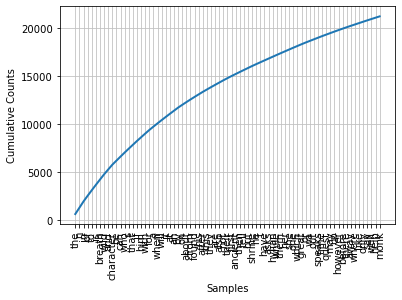

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [7]:
fdist.plot(75,cumulative=True)

TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

1. Since we want to find out which words are important for each race, we're going to create one document per race in BotW. Thus, combine the ZeldaWiki pages into one long list per race.

In [8]:
for i in df_characters.index:   
    roletext = open('./ZeldaCharacterFile-Text/'+df_characters['Name'][i]+'.txt').read()
    roletext = re.sub(r'{|}','',roletext)
    racefile=open('./zeldaRaceCorpus/'+df_characters['Race'][i]+'.txt','a')
    racefile.write(roletext)

2. find the top 5 terms within each race.

In [9]:
racepath='./zeldaRaceCorpus/'
racefiles=os.listdir(racepath)

race_freq=[]
for file in racefiles:
    if not os.path.isdir(file):
        text=open(racepath+file).read()

        # tokenize
        tokens = tokenizer.tokenize(text)
        # exclude punc and stopwords
        cleartokens = [w.lower() for w in tokens if w.isalpha() and w not in stopwords.words('spanish')]
        # text version
        tktext=nltk.Text(cleartokens)

        fdist= nltk.FreqDist(tktext)
        
        race_freq.append({'race':file[:-4],'freqItem':fdist.most_common(5)})

In [10]:
race_freq

[{'race': 'Guardian',
  'freqItem': [('nguardian', 45),
   ('enemy', 45),
   ('the', 45),
   ('to', 45),
   ('they', 45)]},
 {'race': 'Zora',
  'freqItem': [('wild', 150),
   ('breath', 150),
   ('the', 150),
   ('character', 150),
   ('and', 150)]},
 {'race': 'Hinox',
  'freqItem': [('found', 20),
   ('can', 20),
   ('wild', 20),
   ('from', 20),
   ('must', 20)]},
 {'race': 'Octorok',
  'freqItem': [('the', 30),
   ('series', 30),
   ('will', 30),
   ('octorok', 30),
   ('nsky', 30)]},
 {'race': 'Dragon',
  'freqItem': [('actively', 15),
   ('scale', 15),
   ('can', 15),
   ('wild', 15),
   ('spirit', 15)]},
 {'race': 'Unknown',
  'freqItem': [('the', 115),
   ('n', 115),
   ('in', 115),
   ('to', 105),
   ('an', 80)]},
 {'race': 'Sand Seal',
  'freqItem': [('the', 5),
   ('truly', 5),
   ('left', 5),
   ('series', 5),
   ('found', 5)]},
 {'race': 'Bokoblin',
  'freqItem': [('bokoblins', 35),
   ('enemy', 35),
   ('the', 35),
   ('and', 35),
   ('to', 35)]},
 {'race': 'Dog',
  'freqI

3. calculate IDF for every word.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

text=open('./zeldaRaceCorpus/Hylian.txt').read()
tokens = tokenizer.tokenize(text)
cleartokens = [w.lower() for w in tokens if w.isalpha() and w not in stopwords.words('spanish')]

cv = CountVectorizer()
word_count_vector = cv.fit_transform(cleartokens)
tf = pd.DataFrame(word_count_vector.toarray(), columns=cv.get_feature_names())
print(tf)

        abandon  abandoned  abandoning  abducting  abducts  abe  ability  \
0             0          0           0          0        0    0        0   
1             0          0           0          0        0    0        0   
2             0          0           0          0        0    0        0   
3             0          0           0          0        0    0        0   
4             0          0           0          0        0    0        0   
...         ...        ...         ...        ...      ...  ...      ...   
125275        0          0           0          0        0    0        0   
125276        0          0           0          0        0    0        0   
125277        0          0           0          0        0    0        0   
125278        0          0           0          0        0    0        0   
125279        0          0           0          0        0    0        0   

        able  aboard  aboda  ...  yuga  zant  zelda  zeldas  zelo  zone  zora  \
0     

4. calculate TF-IDF. Do that for each race.
* List the 5 top words for each race.
* Are these 5 words more descriptive of the race? If yes, what is it about IDF that makes the words more informative?

In [12]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(cleartokens)
idf = pd.DataFrame({'feature_name':cv.get_feature_names(), 'idf_weights':tfidf_vectorizer.idf_})
print(idf)

     feature_name  idf_weights
0         abandon    10.946555
1       abandoned     9.480218
2      abandoning    10.946555
3       abducting    10.946555
4         abducts    10.946555
...           ...          ...
5081         zone    10.946555
5082         zora     9.304327
5083        zoras    10.946555
5084         zuna    10.946555
5085      ˈhaɪliə    10.946555

[5086 rows x 2 columns]


<ipython-input-13-d0041efab058>:19: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(num/2,2,i)
<ipython-input-13-d0041efab058>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,50))


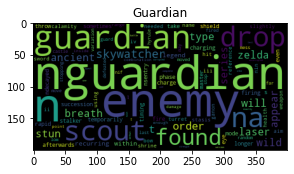

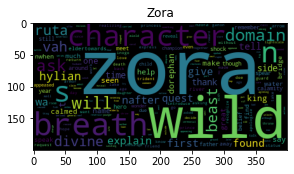

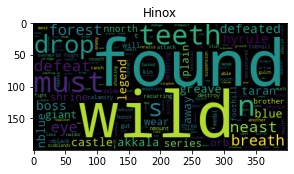

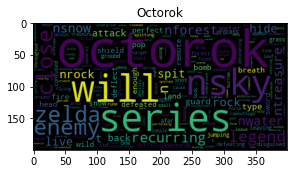

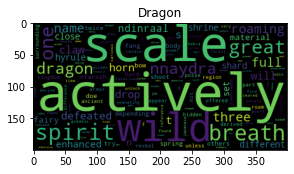

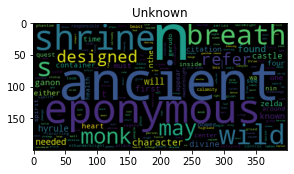

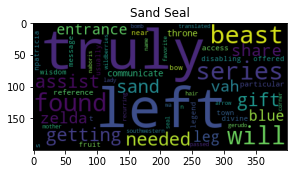

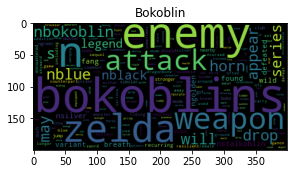

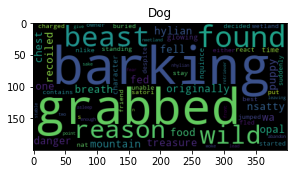

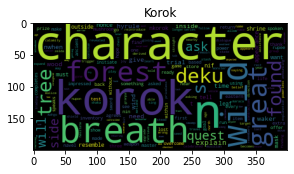

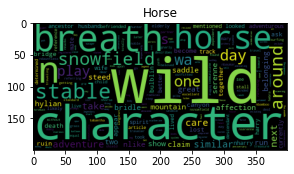

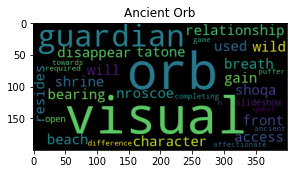

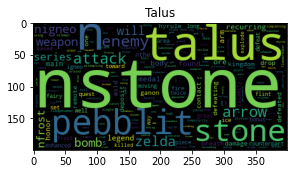

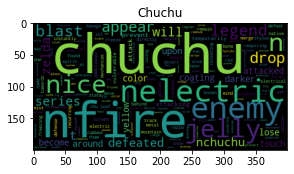

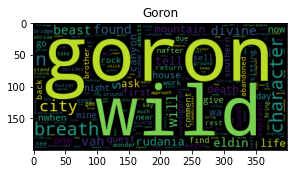

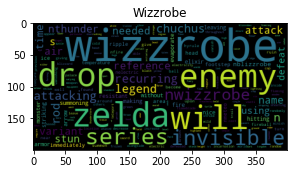

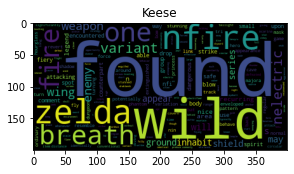

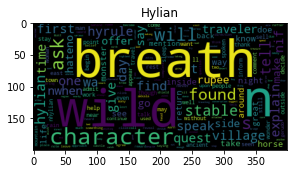

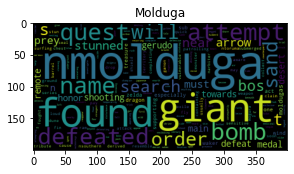

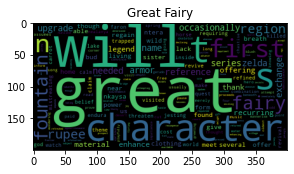

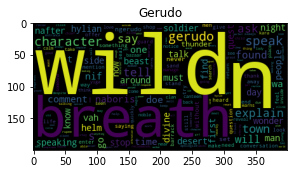

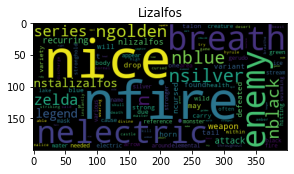

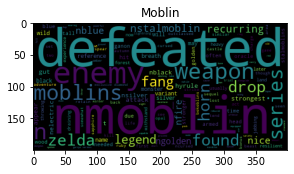

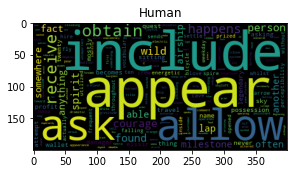

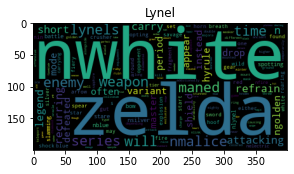

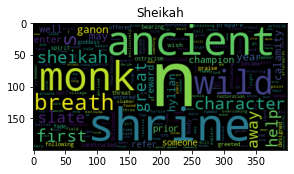

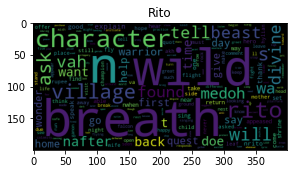

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

racepath='./zeldaRaceCorpus/'
racefiles=os.listdir(racepath)

num = len(racefiles)
i = 0
for file in racefiles:
    if not os.path.isdir(file):
        text = open(racepath+file).read()
        tokens = tokenizer.tokenize(text)
        
        cleartokens = [w.lower() for w in tokens if w.isalpha() and w not in stopwords.words('spanish')]
        
#         he way that I converted my lists to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its TC-IDF, which is the Term Count (TF not normalized by len of document) and IDF you previously computed (rounded up to the nearest integer value).
        wc = WordCloud(collocations = False).generate(' '.join(cleartokens))
        
        plt.figure(figsize=(10,50))
        i=i+1
        plt.subplot(num/2,2,i)
        plt.title(file[:-4])
        plt.imshow(wc)

Overlap can make us get full picture of the things like wikipedia. Modularity makess us focus on one topic each time to see the relation.

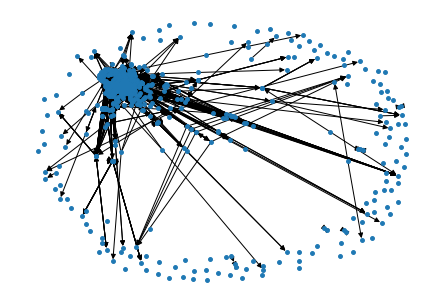

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

DG=nx.DiGraph()

for index, character in df_characters.iterrows():
    DG.add_node(character['Name'], role=character['Role'], gender=character['Gender'], race=character['Race'])

DG.add_edges_from([('Baddek', 'Link'), ('Baddek', 'Nazbi'), ('Baddek', 'Savelle'), ('Baddek', 'Yammo'), ('Link', 'Calamity Ganon'), ('Nazbi', 'Lizalfos'), ('Nazbi', 'Cursed Lizalfos'), ('Nazbi', 'Fire-Breath Lizalfos'), ('Nazbi', 'Electric Lizalfos'), ('Nazbi', 'Blue Lizalfos'), ('Nazbi', 'Black Lizalfos'), ('Nazbi', 'Silver Lizalfos'), ('Nazbi', 'Golden Lizalfos'), ('Nazbi', 'Stalizalfos'), ('Yammo', 'Bokoblin'), ('Yammo', 'Cursed Bokoblin'), ('Yammo', 'Stalmoblin'), ('Yammo', 'Stalizalfos'), ('Yammo', 'Blue Bokoblin'), ('Yammo', 'Black Bokoblin'), ('Yammo', 'Silver Bokoblin'), ('Yammo', 'Golden Bokoblin'), ('Bamboo', 'Stone Talus'), ('Stone Talus', 'Link'), ('Stone Talus', 'Nazbi'), ('Stone Talus', 'Savelle'), ('Stone Talus', 'Yammo'), ('Banji', 'Stone Talus'), ('Baumar', 'Stone Talus'), ('Baumar', 'Kilton'), ('Baumar', 'Calamity Ganon'), ('Baumar', 'Stone Talus (Rare)'), ('Kilton', 'Moblin'), ('Kilton', 'Link'), ('Kilton', 'Old Man'), ('Kilton', 'Silver Moblin'), ('Kilton', 'Bokoblin'), ('Calamity Ganon', 'Dark Beast Ganon'), ('Calamity Ganon', 'Fireblight Ganon'), ('Calamity Ganon', 'Thunderblight Ganon'), ('Calamity Ganon', 'Waterblight Ganon'), ('Calamity Ganon', 'Windblight Ganon'), ('Stone Talus (Rare)', 'Stone Talus'), ('Stone Talus (Rare)', 'Calamity Ganon'), ('Stone Talus (Rare)', 'Link'), ('Stone Talus (Rare)', 'Kilton'), ('Bayge', 'Stone Talus'), ('Bayge', 'Calamity Ganon'), ('Bayge', 'Link'), ('Bayge', 'Kilton'), ('Beedle', 'Lizalfos'), ('Beedle', 'Black Lizalfos'), ('Beedle', 'Golden Lizalfos'), ('Beedle', 'Silver Lizalfos'), ('Beedle', 'Electric Lizalfos'), ('Beedle', 'Fire-Breath Lizalfos'), ('Beedle', 'Ice-Breath Lizalfos'), ('Beedle', 'Cursed Lizalfos'), ('Beedle', 'Stalizalfos'), ('Lizalfos', 'Link'), ('Lizalfos', 'Windblight Ganon'), ('Lizalfos', 'Princess Zelda'), ('Lizalfos', 'Daruk'), ('Lizalfos', 'Urbosa'), ('Lizalfos', 'King Rhoam'), ('Black Lizalfos', 'Stone Talus'), ('Golden Lizalfos', 'Lizalfos'), ('Golden Lizalfos', 'Silver Lizalfos'), ('Golden Lizalfos', 'Blue Lizalfos'), ('Golden Lizalfos', 'Black Lizalfos'), ('Golden Lizalfos', 'Fire-Breath Lizalfos'), ('Golden Lizalfos', 'Ice-Breath Lizalfos'), ('Golden Lizalfos', 'Electric Lizalfos'), ('Golden Lizalfos', 'Stalizalfos'), ('Silver Lizalfos', 'Lizalfos'), ('Silver Lizalfos', 'Blue Lizalfos'), ('Silver Lizalfos', 'Black Lizalfos'), ('Silver Lizalfos', 'Calamity Ganon'), ('Silver Lizalfos', 'Link'), ('Silver Lizalfos', 'Cursed Lizalfos'), ('Silver Lizalfos', 'Golden Lizalfos'), ('Silver Lizalfos', 'Fire-Breath Lizalfos'), ('Silver Lizalfos', 'Ice-Breath Lizalfos'), ('Silver Lizalfos', 'Electric Lizalfos'), ('Silver Lizalfos', 'Stalizalfos'), ('Electric Lizalfos', 'Lizalfos'), ('Electric Lizalfos', 'Link'), ('Fire-Breath Lizalfos', 'Link'), ('Fire-Breath Lizalfos', 'Yiga Footsoldier'), ('Fire-Breath Lizalfos', 'Thunderblight Ganon'), ('Ice-Breath Lizalfos', 'Lizalfos'), ('Ice-Breath Lizalfos', 'Cursed Lizalfos'), ('Ice-Breath Lizalfos', 'Fire-Breath Lizalfos'), ('Ice-Breath Lizalfos', 'Electric Lizalfos'), ('Ice-Breath Lizalfos', 'Blue Lizalfos'), ('Ice-Breath Lizalfos', 'Black Lizalfos'), ('Ice-Breath Lizalfos', 'Silver Lizalfos'), ('Ice-Breath Lizalfos', 'Golden Lizalfos'), ('Ice-Breath Lizalfos', 'Stalizalfos'), ('Cursed Lizalfos', 'Yunobo'), ('Cursed Lizalfos', 'Calamity Ganon'), ('Cursed Lizalfos', 'Fireblight Ganon'), ('Cursed Lizalfos', 'Link'), ('Cursed Lizalfos', 'Princess Zelda'), ('Cursed Lizalfos', 'Revali'), ('Cursed Lizalfos', 'Bludo'), ('Cursed Lizalfos', 'Dark Beast Ganon'), ('Cursed Lizalfos', 'King Rhoam'), ('Cursed Lizalfos', 'Bokoblin'), ('Stalizalfos', 'Lizalfos'), ('Stalizalfos', 'Link'), ('Stalizalfos', 'Cursed Lizalfos'), ('Stalizalfos', 'Stalkoblin'), ('Stalizalfos', 'Stalmoblin'), ('Stalizalfos', 'Blue Lizalfos'), ('Stalizalfos', 'Black Lizalfos'), ('Stalizalfos', 'Silver Lizalfos'), ('Stalizalfos', 'Golden Lizalfos'), ('Stalizalfos', 'Fire-Breath Lizalfos'), ('Stalizalfos', 'Ice-Breath Lizalfos'), ('Stalizalfos', 'Electric Lizalfos'), ('Bolson', 'Lynel'), ('Lynel', 'Hudson'), ('Lynel', 'Link'), ('Brigo', 'Link'), ('Brigo', 'Decayed Guardian'), ('Brigo', 'Guardian Stalker'), ('Cambo', 'Link'), ('Chabi', 'Link'), ('Chabi', 'Kilton'), ('Chabi', 'Blue Bokoblin'), ('Chabi', 'Black Bokoblin'), ('Blue Bokoblin', 'Stone Talus'), ('Blue Bokoblin', 'Calamity Ganon'), ('Blue Bokoblin', 'Link'), ('Blue Bokoblin', 'Kilton'), ('Black Bokoblin', 'Link'), ('Black Bokoblin', 'Nazbi'), ('Black Bokoblin', 'Savelle'), ('Black Bokoblin', 'Yammo'), ('Chork', 'Link'), ('Chork', 'Geggle'), ('Geggle', 'Chork'), ('Chumin', 'Link'), ('Dabi', 'Bokoblin'), ('Dabi', 'Link'), ('Dabi', 'Stalkoblin'), ('Dabi', 'Cursed Moblin'), ('Dabi', 'Cursed Lizalfos'), ('Bokoblin', 'Link'), ('Stalkoblin', 'Bokoblin'), ('Stalkoblin', 'Cursed Bokoblin'), ('Stalkoblin', 'Stalmoblin'), ('Stalkoblin', 'Stalizalfos'), ('Stalkoblin', 'Blue Bokoblin'), ('Stalkoblin', 'Black Bokoblin'), ('Stalkoblin', 'Silver Bokoblin'), ('Stalkoblin', 'Golden Bokoblin'), ('Cursed Moblin', 'Nazbi'), ('Daruk', 'Yunobo'), ('Daruk', 'Calamity Ganon'), ('Daruk', 'Fireblight Ganon'), ('Daruk', 'Link'), ('Daruk', 'Princess Zelda'), ('Daruk', 'Revali'), ('Daruk', 'Bludo'), ('Daruk', 'Dark Beast Ganon'), ('Daruk', 'King Rhoam'), ('Daruk', 'Bokoblin'), ('Yunobo', 'Daruk'), ('Yunobo', 'Bludo'), ('Yunobo', 'Black Moblin'), ('Yunobo', 'Fireblight Ganon'), ('Yunobo', 'Link'), ('Fireblight Ganon', 'Link'), ('Fireblight Ganon', 'Malanya'), ('Princess Zelda', 'King Rhoam'), ('Princess Zelda', 'Link'), ('Princess Zelda', 'Impa'), ('Princess Zelda', 'Hylia'), ('Princess Zelda', 'Daruk'), ('Princess Zelda', 'Kass'), ('Revali', 'Link'), ('Revali', 'Windblight Ganon'), ('Revali', 'Princess Zelda'), ('Revali', 'Daruk'), ('Revali', 'Urbosa'), ('Revali', 'King Rhoam'), ('Bludo', 'Yunobo'), ('Bludo', 'Daruk'), ('Dark Beast Ganon', 'Link'), ('Dark Beast Ganon', 'Calamity Ganon'), ('Dark Beast Ganon', 'Princess Zelda'), ('King Rhoam', 'Link'), ('King Rhoam', 'Old Man'), ('King Rhoam', 'Calamity Ganon'), ('King Rhoam', 'Princess Zelda'), ('King Rhoam', 'Impa'), ('Dauntless', 'Nazbi'), ('Ena', 'Molduga'), ('Ena', 'Teake'), ('Ena', 'Traysi'), ('Ena', 'Igneo Talus Titan'), ('Molduga', 'Nazbi'), ('Teake', 'Link'), ('Teake', 'Riju'), ('Teake', 'Buliara'), ('Traysi', 'Link'), ('Traysi', 'Ploka'), ('Traysi', 'Ashai'), ('Traysi', 'Strade'), ('Traysi', 'Lyndae'), ('Traysi', 'Muava'), ('Traysi', 'Dinraal'), ('Traysi', 'Farosh'), ('Traysi', 'Naydra'), ('Traysi', 'King Rhoam'), ('Traysi', 'Princess Zelda'), ('Traysi', 'Molduga'), ('Traysi', 'Molduking'), ('Endai', 'Link'), ('Endai', 'Master Kohga'), ('Master Kohga', 'Link'), ('Epona', 'Link'), ('Epona', 'Malanya'), ('Malanya', 'Link'), ('Fyson', 'Lizalfos'), ('Fyson', 'Link'), ('Goflam', 'Link'), ('Greyson', 'Link'), ('Greyson', 'Yiga Footsoldier'), ('Greyson', 'Thunderblight Ganon'), ('Yiga Footsoldier', 'Master Kohga'), ('Yiga Footsoldier', 'Link'), ('Yiga Footsoldier', 'Calamity Ganon'), ('Yiga Footsoldier', 'Monk Maz Koshia'), ('Yiga Footsoldier', 'Robbie'), ('Yiga Footsoldier', 'Purah'), ('Heehl', 'Dark Beast Ganon'), ('Heehl', 'Fireblight Ganon'), ('Heehl', 'Thunderblight Ganon'), ('Heehl', 'Waterblight Ganon'), ('Heehl', 'Windblight Ganon'), ('Waterblight Ganon', 'Lizalfos'), ('Waterblight Ganon', 'Link'), ('Windblight Ganon', 'Link'), ('Windblight Ganon', 'Master Kohga'), ('Hestu', 'Link'), ('Hestu', 'Calamity Ganon'), ('Hestu', 'Princess Zelda'), ('Hudson', 'Rhondson'), ('Hudson', 'Bolson'), ('Hudson', 'Link'), ('Rhondson', 'Hudson'), ('Rhondson', 'Link'), ('Hylia', 'Keese'), ('Hylia', 'Link'), ('Hylia', 'Electric Keese'), ('Hylia', 'Ice Keese'), ('Ice Keese', 'Keese'), ('Ice Keese', 'Link'), ('Ice Keese', 'Fire Keese'), ('Ice Keese', 'Electric Keese'), ('Kabetta', 'Bayge'), ('Kabetta', 'Heehl'), ('Kanny', 'Link'), ('Kanny', 'Rock Octorok'), ('Kanny', 'Water Octorok'), ('Kanny', 'Snow Octorok'), ('Kanny', 'Treasure Octorok'), ('Kanny', 'Sky Octorok'), ('Snow Octorok', 'Link'), ('Snow Octorok', 'Rock Octorok'), ('Snow Octorok', 'Water Octorok'), ('Snow Octorok', 'Forest Octorok'), ('Snow Octorok', 'Treasure Octorok'), ('Snow Octorok', 'Sky Octorok'), ('Treasure Octorok', 'Link'), ('Treasure Octorok', 'Rock Octorok'), ('Treasure Octorok', 'Water Octorok'), ('Treasure Octorok', 'Forest Octorok'), ('Treasure Octorok', 'Snow Octorok'), ('Treasure Octorok', 'Sky Octorok'), ('Sky Octorok', 'Link'), ('Kapson', 'Hylia'), ('Kapson', 'Link'), ('Kapson', 'Mipha'), ('Kapson', 'Hudson'), ('Kapson', 'Rhondson'), ('Mipha', 'Chuchu'), ('Mipha', 'Fire Chuchu'), ('Mipha', 'Electric Chuchu'), ('Karson', 'Bokoblin'), ('Karson', 'Silver Bokoblin'), ('Karson', 'Blue Bokoblin'), ('Karson', 'Black Bokoblin'), ('Karson', 'Stalkoblin'), ('Silver Bokoblin', 'Bokoblin'), ('Silver Bokoblin', 'Blue Bokoblin'), ('Silver Bokoblin', 'Black Bokoblin'), ('Silver Bokoblin', 'Golden Bokoblin'), ('Silver Bokoblin', 'Stalkoblin'), ('Kass', 'Lizalfos'), ('Kass', 'Silver Lizalfos'), ('Kass', 'Blue Lizalfos'), ('Kass', 'Black Lizalfos'), ('Kass', 'Fire-Breath Lizalfos'), ('Kass', 'Ice-Breath Lizalfos'), ('Kass', 'Electric Lizalfos'), ('Kass', 'Stalizalfos'), ('Blue Lizalfos', 'Lizalfos'), ('Blue Lizalfos', 'Black Lizalfos'), ('Blue Lizalfos', 'Golden Lizalfos'), ('Blue Lizalfos', 'Silver Lizalfos'), ('Blue Lizalfos', 'Electric Lizalfos'), ('Blue Lizalfos', 'Fire-Breath Lizalfos'), ('Blue Lizalfos', 'Ice-Breath Lizalfos'), ('Blue Lizalfos', 'Cursed Lizalfos'), ('Blue Lizalfos', 'Stalizalfos'), ('Kenyo', 'Lynel'), ('Kenyo', 'Old Man'), ('Kenyo', 'Silver Lynel'), ('Kenyo', 'Link'), ('Kenyo', 'Blue-Maned Lynel'), ('Kenyo', 'White-Maned Lynel'), ('Old Man', 'Princess Zelda'), ('Old Man', 'Link'), ('Old Man', 'Calamity Ganon'), ('Silver Lynel', 'Link'), ('Silver Lynel', 'Naydra'), ('Blue-Maned Lynel', 'Lynel'), ('White-Maned Lynel', 'Lynel'), ('White-Maned Lynel', 'Blue-Maned Lynel'), ('White-Maned Lynel', 'Bokoblin'), ('Silver Moblin', 'Moblin'), ('Silver Moblin', 'Calamity Ganon'), ('Silver Moblin', 'Golden Moblin'), ('Meeshy', 'Link'), ('Meeshy', 'Guardian Scout I'), ('Guardian Scout I', 'Calamity Ganon'), ('Meghyn', 'Nat'), ('Nat', 'Meghyn'), ('Mei', 'Link'), ('Mils', 'Mina'), ('Mina', 'Mils'), ('Mina', 'Link'), ('Chuchu', 'Link'), ('Chuchu', 'Kilton'), ('Chuchu', 'Blue Bokoblin'), ('Chuchu', 'Black Bokoblin'), ('Fire Chuchu', 'Dark Beast Ganon'), ('Fire Chuchu', 'Fireblight Ganon'), ('Fire Chuchu', 'Thunderblight Ganon'), ('Fire Chuchu', 'Waterblight Ganon'), ('Fire Chuchu', 'Windblight Ganon'), ('Electric Chuchu', 'Molduga'), ('Electric Chuchu', 'Teake'), ('Electric Chuchu', 'Traysi'), ('Electric Chuchu', 'Igneo Talus Titan'), ('Misko', 'Link'), ('Misko', 'Prissen'), ('Misko', 'Domidak'), ('Prissen', 'Domidak'), ('Prissen', 'Link'), ('Prissen', 'Misko'), ('Domidak', 'Prissen'), ('Domidak', 'Link'), ('Domidak', 'Misko'), ('Naydra', 'Keese'), ('Naydra', 'Link'), ('Naydra', 'Fire Keese'), ('Naydra', 'Electric Keese'), ('Fire Keese', 'Keese'), ('Fire Keese', 'Link'), ('Fire Keese', 'Electric Keese'), ('Fire Keese', 'Ice Keese'), ('Pelison', 'Greyson'), ('Pelison', 'Axyl'), ('Pelison', 'Bolson'), ('Pelison', 'Hudson'), ('Pelison', 'Rhondson'), ('Axyl', 'Dorill'), ('Axyl', 'Pelison'), ('Pikango', 'Link'), ('Pikango', 'Impa'), ('Pikango', 'Master Kohga'), ('Impa', 'Purah'), ('Impa', 'Paya'), ('Impa', 'Princess Zelda'), ('Impa', 'Link'), ('Impa', 'Hylia'), ('Impa', 'Bokoblin'), ('Impa', 'Calamity Ganon'), ('Impa', 'King Rhoam'), ('Impa', 'Fire Wizzrobe'), ('Urbosa', 'Lizalfos'), ('Urbosa', 'Link'), ('Urbosa', 'Cursed Lizalfos'), ('Urbosa', 'Stalkoblin'), ('Urbosa', 'Stalmoblin'), ('Urbosa', 'Blue Lizalfos'), ('Urbosa', 'Black Lizalfos'), ('Urbosa', 'Silver Lizalfos'), ('Urbosa', 'Golden Lizalfos'), ('Urbosa', 'Fire-Breath Lizalfos'), ('Urbosa', 'Ice-Breath Lizalfos'), ('Urbosa', 'Electric Lizalfos'), ('Rik', 'Steen'), ('Rik', 'Olkin'), ('Steen', 'Trissa'), ('Steen', 'Link'), ('Steen', 'Olkin'), ('Olkin', 'Mellie'), ('Olkin', 'Link'), ('Sho', 'Bokoblin'), ('Sho', 'Blue Bokoblin'), ('Sho', 'Black Bokoblin'), ('Sho', 'Golden Bokoblin'), ('Sho', 'Stalkoblin'), ('Golden Bokoblin', 'Bokoblin'), ('Golden Bokoblin', 'Silver Bokoblin'), ('Golden Bokoblin', 'Blue Bokoblin'), ('Golden Bokoblin', 'Black Bokoblin'), ('Golden Bokoblin', 'Stalkoblin'), ('Sorelia', 'Lizalfos'), ('Sorelia', 'Blue Lizalfos'), ('Sorelia', 'Black Lizalfos'), ('Sorelia', 'Calamity Ganon'), ('Sorelia', 'Link'), ('Sorelia', 'Cursed Lizalfos'), ('Sorelia', 'Golden Lizalfos'), ('Sorelia', 'Fire-Breath Lizalfos'), ('Sorelia', 'Ice-Breath Lizalfos'), ('Sorelia', 'Electric Lizalfos'), ('Sorelia', 'Stalizalfos'), ('Spoone', 'Link'), ('Spoone', 'Naydra'), ('Toren', 'Moblin'), ('Toren', 'Calamity Ganon'), ('Toren', 'Golden Moblin'), ('Golden Moblin', 'Moblin'), ('Golden Moblin', 'Link'), ('Golden Moblin', 'Old Man'), ('Golden Moblin', 'Silver Moblin'), ('Golden Moblin', 'Bokoblin'), ('Totsuna', 'Link'), ('Tye', 'Link'), ('Tye', 'Rock Octorok'), ('Tye', 'Water Octorok'), ('Tye', 'Forest Octorok'), ('Tye', 'Treasure Octorok'), ('Tye', 'Sky Octorok'), ('Forest Octorok', 'Link'), ('Forest Octorok', 'Rock Octorok'), ('Forest Octorok', 'Water Octorok'), ('Forest Octorok', 'Snow Octorok'), ('Forest Octorok', 'Treasure Octorok'), ('Forest Octorok', 'Sky Octorok'), ('Stalmoblin', 'King Rhoam'), ('Stalmoblin', 'Link'), ('Stalmoblin', 'Impa'), ('Stalmoblin', 'Hylia'), ('Stalmoblin', 'Daruk'), ('Stalmoblin', 'Kass'), ('Cursed Bokoblin', 'Bokoblin'), ('Cursed Bokoblin', 'Link'), ('Cursed Bokoblin', 'Stalkoblin'), ('Cursed Bokoblin', 'Cursed Moblin'), ('Cursed Bokoblin', 'Cursed Lizalfos'), ('Zyle', 'Link'), ('Naddon', 'Link'), ('Naddon', 'Rock Octorok'), ('Naddon', 'Water Octorok'), ('Naddon', 'Forest Octorok'), ('Naddon', 'Snow Octorok'), ('Naddon', 'Sky Octorok'), ('Dah Hesho', 'Lynel'), ('Dah Hesho', 'Blue-Maned Lynel'), ('Dah Hesho', 'Bokoblin'), ('Dmitri', 'Kaifa'), ('Dmitri', 'Jana'), ('Dmitri', 'Gleema'), ('Dmitri', 'Link'), ('Dmitri', 'Epona'), ('Kaifa', 'Dmitri'), ('Kaifa', 'Jana'), ('Kaifa', 'Gleema'), ('Jana', 'Dmitri'), ('Jana', 'Kaifa'), ('Jana', 'Gleema'), ('Jana', 'Link'), ('Jana', 'Hudson'), ('Gleema', 'Master Kohga'), ('Gleema', 'Link'), ('Gleema', 'Calamity Ganon'), ('Gleema', 'Monk Maz Koshia'), ('Gleema', 'Robbie'), ('Gleema', 'Purah'), ('Monk Maz Koshia', 'Link'), ('Monk Maz Koshia', 'Yiga Footsoldier'), ('Monk Maz Koshia', 'Thunderblight Ganon'), ('Robbie', 'Jerrin'), ('Robbie', 'Grant\\u00e9'), ('Robbie', 'Purah'), ('Robbie', 'Princess Zelda'), ('Robbie', 'Link'), ('Robbie', 'Calamity Ganon'), ('Purah', 'Impa'), ('Purah', 'Paya'), ('Purah', 'Symin'), ('Purah', 'Monk Maz Koshia'), ('Purah', 'Calamity Ganon'), ('Purah', 'Princess Zelda'), ('Purah', 'Robbie'), ('Kah Mael', 'Hylia'), ('Kah Mael', 'Link'), ('Kah Mael', 'Calamity Ganon'), ("Ke'nai Shakah", 'Hylia'), ("Ke'nai Shakah", 'Link'), ("Ke'nai Shakah", 'Calamity Ganon'), ('Lonni', 'Stalnox'), ('Stalnox', 'Yunobo'), ('Stalnox', 'Calamity Ganon'), ('Stalnox', 'Fireblight Ganon'), ('Stalnox', 'Link'), ('Stalnox', 'Princess Zelda'), ('Stalnox', 'Revali'), ('Stalnox', 'Bludo'), ('Stalnox', 'Dark Beast Ganon'), ('Stalnox', 'King Rhoam'), ('Stalnox', 'Bokoblin'), ('Nell', 'Link'), ('Nell', 'Blue Moblin'), ('Blue Moblin', 'Link'), ('Blue Moblin', 'Decayed Guardian'), ('Blue Moblin', 'Guardian Stalker'), ('Tenne', 'Dmitri'), ('Tenne', 'Kaifa'), ('Tenne', 'Jana'), ('Tenne', 'Gleema'), ('Tenne', 'Link'), ('Tenne', 'Epona'), ('Tutsuwa Nima', 'Hylia'), ('Tutsuwa Nima', 'Link'), ('Tutsuwa Nima', 'Calamity Ganon'), ('Ze Kasho', 'Hylia'), ('Ze Kasho', 'Link'), ('Ze Kasho', 'Calamity Ganon'), ('Hagie', 'Ruli'), ('Hagie', 'Hunnie'), ('Ruli', 'Hagie'), ('Ruli', 'Hunnie'), ('Hunnie', 'Hagie'), ('Hunnie', 'Ruli'), ('Moggs', 'Fyson'), ('Monari', 'Moggs'), ('Ritaag Zumo', 'Hylia'), ('Ritaag Zumo', 'Link'), ('Ritaag Zumo', 'Calamity Ganon'), ("Tu Ka'loh", 'Hylia'), ("Tu Ka'loh", 'Link'), ("Tu Ka'loh", 'Calamity Ganon'), ('Aya', 'Khini'), ('Aya', 'Rudi'), ('Hoz', 'Kilton'), ('Jerrin', 'Robbie'), ('Jerrin', 'Grant\\u00e9'), ('Jerrin', 'Link'), ('Jerrin', 'Purah'), ('Jerrin', 'Nanna'), ('Jerrin', 'Symin'), ('Nanna', 'Claree'), ('Nanna', 'Lasli'), ('Nanna', 'Impa'), ('Nanna', 'Purah'), ('Nanna', 'Jerrin'), ('Nanna', 'Robbie'), ('Nanna', 'Symin'), ('Symin', 'Purah'), ('Symin', 'Link'), ('Symin', 'Impa'), ('Symin', 'Calamity Ganon'), ('Katosa Aug', 'Hylia'), ('Katosa Aug', 'Link'), ('Katosa Aug', 'Calamity Ganon'), ('Nobo', 'Link'), ('Nobo', 'Pitar'), ('Zuna Kai', 'Hylia'), ('Zuna Kai', 'Link'), ('Zuna Kai', 'Calamity Ganon'), ('Glendo', 'Link'), ('Glendo', 'Keese'), ('Etsu Korima', 'Hylia'), ('Etsu Korima', 'Link'), ('Etsu Korima', 'Calamity Ganon'), ('Rohta Chigah', 'Hylia'), ('Rohta Chigah', 'Link'), ('Rohta Chigah', 'Calamity Ganon'), ('Ruvo Korbah', 'Hylia'), ('Ruvo Korbah', 'Link'), ('Ruvo Korbah', 'Calamity Ganon'), ('Yowaka Ita', 'Hylia'), ('Yowaka Ita', 'Link'), ('Yowaka Ita', 'Calamity Ganon'), ('Aliza', 'Link'), ('Benny', 'Link'), ('Canni', 'Epona'), ('Dah Kaso', 'Hylia'), ('Dah Kaso', 'Link'), ('Dah Kaso', 'Calamity Ganon'), ('Dai', 'Lynel'), ('Dai', 'Golden Lynel'), ('Golden Lynel', 'Lynel'), ('Golden Lynel', 'Old Man'), ('Golden Lynel', 'Silver Lynel'), ('Golden Lynel', 'Link'), ('Golden Lynel', 'Blue-Maned Lynel'), ('Golden Lynel', 'White-Maned Lynel'), ('Gotter', 'Princess Zelda'), ('Gotter', 'Chuchu'), ('Gotter', 'Hinox'), ('Hinox', 'Link'), ('Hinox', 'Decayed Guardian'), ('Hinox', 'Guardian Stalker'), ('Haite', 'Link'), ('Haite', 'Myti'), ('Myti', 'Link'), ('Myti', 'Trott'), ('Myti', 'Haite'), ('Katah Chuki', 'Hylia'), ('Katah Chuki', 'Link'), ('Katah Chuki', 'Calamity Ganon'), ('Namika Ozz', 'Hylia'), ('Namika Ozz', 'Link'), ('Namika Ozz', 'Calamity Ganon'), ('Noya Neha', 'Hylia'), ('Noya Neha', 'Link'), ('Noya Neha', 'Calamity Ganon'), ("Saas Ko'sah", 'Hylia'), ("Saas Ko'sah", 'Link'), ("Saas Ko'sah", 'Calamity Ganon'), ('Toffa', 'Link'), ('Toffa', 'Princess Zelda'), ('Branli', 'Link'), ('Konba', 'Link'), ("Maag No'rah", 'Hylia'), ("Maag No'rah", 'Link'), ("Maag No'rah", 'Calamity Ganon'), ('Mijah Rokee', 'Hylia'), ('Mijah Rokee', 'Link'), ('Mijah Rokee', 'Calamity Ganon'), ('Shira Gomar', 'Hylia'), ('Shira Gomar', 'Link'), ('Shira Gomar', 'Calamity Ganon'), ('Black Moblin', 'Stone Talus'), ('Ashe', 'Shamae'), ('Ashe', 'Link'), ('Ashe', 'Breen'), ('Ashe', 'Kish'), ('Shamae', 'Ashe'), ('Breen', 'Epona'), ('Kish', 'Link'), ('Dorill', 'Axyl'), ('Dorill', 'Bludo'), ('Bladon', 'Gonguron'), ('Gonguron', 'Bladon'), ('Boldon', 'Bolson'), ('Boldon', 'Naddon'), ('Boldon', 'Link'), ('Dayto', 'Guardian Stalker'), ('Douma', 'Link'), ('Douma', 'Mipha'), ('Drak', 'Bludo'), ('Drak', 'Link'), ('Drak', 'Yunobo'), ('Dugby', 'Grapp'), ('Dugby', 'Link'), ('Grapp', 'Dugby'), ('Grapp', 'Bludo'), ('Fin', 'Russ'), ('Fin', 'Link'), ('Russ', 'Fin'), ('Gaile', 'Link'), ('Gorae Torr', 'Hylia'), ('Gorae Torr', 'Link'), ('Gorae Torr', 'Calamity Ganon'), ('Jengo', 'Dorill'), ('Jengo', 'Greyson'), ('Jengo', 'Bohrin'), ('Jengo', 'Bludo'), ('Kairo', 'Yunobo'), ('Mayro', 'Ozunda'), ('Offrak', 'Aji'), ('Aji', 'Offrak'), ('Aji', 'Fyson'), ('Aji', 'Pelison'), ('Bargoh', 'Link'), ('Bargoh', 'Bludo'), ('Bargoh', 'Yunobo'), ('Fugo', 'Rohan'), ('Fugo', 'Slergo'), ('Fugo', 'Link'), ('Fugo', 'Igneo Talus'), ('Rohan', 'Fugo'), ('Rohan', 'Slergo'), ('Rohan', 'Igneo Talus'), ('Slergo', 'Rohan'), ('Slergo', 'Fugo'), ('Igneo Talus', 'Lizalfos'), ('Igneo Talus', 'Black Lizalfos'), ('Igneo Talus', 'Golden Lizalfos'), ('Igneo Talus', 'Silver Lizalfos'), ('Igneo Talus', 'Electric Lizalfos'), ('Igneo Talus', 'Fire-Breath Lizalfos'), ('Igneo Talus', 'Ice-Breath Lizalfos'), ('Igneo Talus', 'Cursed Lizalfos'), ('Igneo Talus', 'Stalizalfos'), ('Krane', 'Bludo'), ('Pyle', 'Rogaro'), ('Pyle', 'Bludo'), ('Rogaro', 'Pyle'), ('Tray', 'Volcon'), ('Volcon', 'Tray'), ('Akrah', 'Garshon'), ('Akrah', 'Onya'), ('Akrah', 'Link'), ('Akrah', 'Zumi'), ('Garshon', 'Akrah'), ('Garshon', 'Onya'), ('Garshon', 'Link'), ('Daag Chokah', 'Hylia'), ('Daag Chokah', 'Link'), ('Daag Chokah', 'Calamity Ganon'), ('Ketoh Wawai', 'Hylia'), ('Ketoh Wawai', 'Link'), ('Ketoh Wawai', 'Calamity Ganon'), ('Kuhn Sidajj', 'Hylia'), ('Kuhn Sidajj', 'Link'), ('Kuhn Sidajj', 'Calamity Ganon'), ('Maag Halan', 'Hylia'), ('Maag Halan', 'Link'), ('Maag Halan', 'Calamity Ganon'), ('Chio', 'Link'), ('Chio', 'Hestu'), ('Damia', 'Link'), ('Daz', 'Link'), ('Kula', 'The Great Deku Tree'), ('Kula', 'Kula'), ('The Great Deku Tree', 'Link'), ('The Great Deku Tree', 'Princess Zelda'), ('Maca', 'Link'), ('Natie', 'Link'), ('Peeks', 'The Great Deku Tree'), ('Peeks', 'Link'), ('Pepp', 'Link'), ('Walton', 'Link'), ('Blynne', 'Link'), ('Jini', 'Link'), ('Loone', 'Link'), ('Loone', 'Roscoe'), ('Roscoe', 'Link'), ('Pumaag Nitae', 'Hylia'), ('Pumaag Nitae', 'Link'), ('Pumaag Nitae', 'Calamity Ganon'), ('Shae Katha', 'Hylia'), ('Shae Katha', 'Link'), ('Shae Katha', 'Calamity Ganon'), ('Shoqa Tatone', 'Hylia'), ('Shoqa Tatone', 'Link'), ('Shoqa Tatone', 'Calamity Ganon'), ('Barta', 'Link'), ('Barta', 'Liana'), ('Barta', 'Leena'), ('Barta', 'Riju'), ('Barta', 'Kotta'), ('Barta', 'Perda'), ('Liana', 'Link'), ('Liana', 'Leena'), ('Liana', 'Riju'), ('Liana', 'Barta'), ('Liana', 'Kotta'), ('Leena', 'Link'), ('Leena', 'Liana'), ('Leena', 'Riju'), ('Leena', 'Barta'), ('Leena', 'Kotta'), ('Riju', 'Urbosa'), ('Riju', 'Link'), ('Riju', 'Buliara'), ('Riju', 'Teake'), ('Riju', 'Patricia'), ('Kotta', 'Link'), ('Kotta', 'Liana'), ('Kotta', 'Barta'), ('Perda', 'Pyra'), ('Perda', 'Yaido'), ('Perda', 'Sumati'), ('Perda', 'Barta'), ('Perda', 'Ashai'), ('Perda', 'Wabbin'), ('Calisa', 'Link'), ('Eighth Heroine', 'Seven Heroines'), ('Eighth Heroine', 'Bozai'), ('Eighth Heroine', 'Link'), ('Bozai', 'Link'), ('Gartan', 'Link'), ('Lukan', 'Link'), ('Anche', 'Link'), ('Anche', 'Furosa'), ('Furosa', 'Link'), ('Furosa', 'Greta'), ('Furosa', 'Pokki'), ('Furosa', 'Anche'), ('Benja', 'Robsten'), ('Benja', 'Link'), ('Robsten', 'Benja'), ('Robsten', 'Link'), ('Dila Maag', 'Hylia'), ('Dila Maag', 'Link'), ('Dila Maag', 'Calamity Ganon'), ('Dillie', 'Jora'), ('Dillie', 'Link'), ('Jora', 'Dillie'), ('Jora', 'Link'), ('Jora', 'Bokoblin'), ('Keive Tala', 'Hylia'), ('Keive Tala', 'Link'), ('Keive Tala', 'Calamity Ganon'), ('Konora', 'Link'), ("Korsh O'hu", 'Hylia'), ("Korsh O'hu", 'Link'), ("Korsh O'hu", 'Calamity Ganon'), ('Kyra', 'Link'), ('Misae Suma', 'Hylia'), ('Misae Suma', 'Link'), ('Misae Suma', 'Calamity Ganon'), ('Patricia', 'Link'), ('Patricia', 'Padda'), ('Padda', 'Riju'), ('Padda', 'Patricia'), ('Padda', 'Link'), ('Pokki', 'Link'), ('Pokki', 'Furosa'), ('Raqa Zunzo', 'Hylia'), ('Raqa Zunzo', 'Link'), ('Raqa Zunzo', 'Calamity Ganon'), ('Buliara', 'Riju'), ('Buliara', 'Link'), ('Shabonne', 'Tali'), ('Shabonne', 'Link'), ('Tali', 'Teli'), ('Tali', 'Shabonne'), ('Strade', 'Link'), ('Strade', 'Lyndae'), ('Lyndae', 'Strade'), ('Sudrey', 'Riju'), ('Sudrey', 'Link'), ('Takama Shiri', 'Hylia'), ('Takama Shiri', 'Link'), ('Takama Shiri', 'Calamity Ganon'), ('Teli', 'Tali'), ('Teli', 'Link'), ('Teli', 'Robbie'), ('Teli', 'Calamity Ganon'), ('Tera', 'Kaysa'), ('Tera', 'Cotera'), ('Tera', 'Link'), ('Kaysa', 'Tera'), ('Kaysa', 'Cotera'), ('Kaysa', 'Toren'), ('Cotera', 'Tera'), ('Cotera', 'Kaysa'), ('Cotera', 'Link'), ('Cotera', 'Dorian'), ('Tho Kayu', 'Hylia'), ('Tho Kayu', 'Link'), ('Tho Kayu', 'Calamity Ganon'), ('Ardin', 'Jules'), ('Ardin', 'Nellie'), ('Ardin', 'Estan'), ('Ardin', 'Spera'), ('Jules', 'Link'), ('Nellie', 'Risa'), ('Nellie', 'Link'), ('Nellie', 'Lorn'), ('Nellie', 'Ardin'), ('Estan', 'Maike'), ('Estan', 'Link'), ('Estan', 'Frita'), ('Spera', 'Link'), ('Ashai', 'Link'), ('Ashai', 'Pasha'), ('Ashai', 'Dina'), ('Ashai', 'Risa'), ('Pasha', 'Ashai'), ('Pasha', 'Link'), ('Dina', 'Link'), ('Risa', 'Nellie'), ('Risa', 'Ashai'), ('Risa', 'Link'), ('Risa', 'Pasha'), ('Risa', 'Dina'), ('Aurie Taamu', 'Ashai'), ('Aurie Taamu', 'Isha'), ('Isha', 'Link'), ('Isha', 'Cara'), ('Babi', 'Link'), ('Babi', 'Malena'), ('Babi', 'Marta'), ('Babi', 'Smaude'), ('Babi', 'Teake'), ('Malena', 'Link'), ('Malena', 'Molduga'), ('Marta', 'Link'), ('Marta', 'Babi'), ('Marta', 'Riju'), ('Smaude', 'Link'), ('Bertri', 'Riju'), ('Bertri', 'Link'), ('Calyban', 'Link'), ('Calyban', 'Dalia'), ('Dalia', 'Lorn'), ('Dalia', 'Link'), ('Dalia', 'Kalani'), ('Dalia', 'Makure'), ('Dalia', 'Pearle'), ('Cara', 'Isha'), ('Cara', 'Link'), ('Cara', 'Ashai'), ('Lorn', 'Dalia'), ('Lorn', 'Link'), ('Kalani', 'Danda'), ('Kalani', 'Makure'), ('Kalani', 'Frita'), ('Kalani', 'Ashai'), ('Kalani', 'Pearle'), ('Kalani', 'Dalia'), ('Makure', 'Danda'), ('Makure', 'Kalani'), ('Makure', 'Ashai'), ('Makure', 'Pearle'), ('Makure', 'Dalia'), ('Pearle', 'Rotana'), ('Pearle', 'Urbosa'), ('Pearle', 'Spera'), ('Pearle', 'Link'), ('Pearle', 'Kalani'), ('Pearle', 'Makure'), ('Pearle', 'Ashai'), ('Danda', 'Kalani'), ('Danda', 'Makure'), ('Danda', 'Link'), ('Deltan', 'Link'), ('Dorrah', 'Merina'), ('Dorrah', 'Link'), ('Dorrah', 'Riju'), ('Merina', 'Dorrah'), ('Merina', 'Link'), ('Essa', 'Frelly'), ('Essa', 'Link'), ('Frelly', 'Kohm'), ('Frelly', 'Link'), ('Maike', 'Estan'), ('Maike', 'Link'), ('Frita', 'Link'), ('Fegran', 'Link'), ('Kohm', 'Frelly'), ('Kohm', 'Link'), ('Greta', 'Link'), ('Katta', 'Riju'), ('Katta', 'Link'), ('Laine', 'Link'), ('Laine', 'Tali'), ('Lashley', 'Link'), ('Lashley', 'Riju'), ('Muava', 'Link'), ('Nali', 'Pritana'), ('Nali', 'Riju'), ('Nali', 'Urbosa'), ('Nali', 'Link'), ('Pritana', 'Nali'), ('Pritana', 'Riju'), ('Pritana', 'Urbosa'), ('Pritana', 'Link'), ('Olu', 'Link'), ('Olu', 'Romah'), ('Romah', 'Link'), ('Rotana', 'Pearle'), ('Rotana', 'Link'), ('Rotana', 'Seven Heroines'), ('Rotana', 'Urbosa'), ('Ploka', 'Reeza'), ('Ploka', 'Link'), ('Ploka', 'Riju'), ('Ploka', 'Traysi'), ('Reeza', 'Ploka'), ('Reeza', 'Link'), ('Reeza', 'Riju'), ('Reeza', 'Buliara'), ('Pyra', 'Sumati'), ('Pyra', 'Yaido'), ('Pyra', 'Rotana'), ('Pyra', 'Saula'), ('Pyra', 'Perda'), ('Sumati', 'Pyra'), ('Sumati', 'Yaido'), ('Sumati', 'Rotana'), ('Sumati', 'Saula'), ('Sumati', 'Perda'), ('Yaido', 'Pyra'), ('Yaido', 'Sumati'), ('Yaido', 'Rotana'), ('Yaido', 'Saula'), ('Yaido', 'Perda'), ('Saula', 'Link'), ('Saula', 'Yaido'), ('Rima', 'Buliara'), ('Rima', 'Link'), ('Rima', 'Riju'), ('Rima', 'Patricia'), ('Tauma', 'Link'), ('Molduking', 'Molduga'), ('Molduking', 'Teake'), ('Molduking', 'Traysi'), ('Molduking', 'Igneo Talus Titan'), ('Emri', 'Link'), ('Guy', 'Link'), ('Kachoo', 'Link'), ('Nobiro', 'Link'), ('Ripp', 'Link'), ('Ripp', 'Vilia'), ('Vilia', 'Benja'), ('Vilia', 'Link'), ('Vilia', 'Riju'), ('Shaillu', 'Link'), ('Canolo', 'Sesami'), ('Canolo', 'Oliff'), ('Canolo', 'Canolo'), ('Canolo', 'Palme'), ('Canolo', 'Link'), ('Canolo', 'Blue Bokoblin'), ('Sesami', 'Link'), ('Sesami', 'Oliff'), ('Sesami', 'Flaxel'), ('Sesami', 'Canolo'), ('Sesami', 'Palme'), ('Oliff', 'Sesami'), ('Oliff', 'Link'), ('Flaxel', 'Sesami'), ('Flaxel', 'Oliff'), ('Flaxel', 'Flaxel'), ('Flaxel', 'Palme'), ('Flaxel', 'Link'), ('Flaxel', 'Blue Bokoblin'), ('Keeha Yoog', 'Hylia'), ('Keeha Yoog', 'Link'), ('Keeha Yoog', 'Calamity Ganon'), ('Kema Kosassa', 'Hylia'), ('Kema Kosassa', 'Link'), ('Kema Kosassa', 'Calamity Ganon'), ('Kihiro Moh', 'Hylia'), ('Kihiro Moh', 'Link'), ('Kihiro Moh', 'Calamity Ganon'), ('Maypin', 'Link'), ('Moza', 'Link'), ('Piaffe', 'Link'), ('Pirou', 'Link'), ('Sasa Kai', 'Hylia'), ('Sasa Kai', 'Link'), ('Sasa Kai', 'Calamity Ganon'), ('Suma Sahma', 'Hylia'), ('Suma Sahma', 'Link'), ('Suma Sahma', 'Calamity Ganon'), ('Falmark', 'Link'), ('Falmark', 'Baumar'), ('Teba', 'Saki'), ('Teba', 'Tulin'), ('Teba', 'Revali'), ('Teba', 'Harth'), ('Teba', 'Link'), ('Teba', 'Calamity Ganon'), ('Teba', 'Windblight Ganon'), ('Saki', 'Teba'), ('Saki', 'Tulin'), ('Saki', 'Link'), ('Saki', 'Revali'), ('Tulin', 'Teba'), ('Tulin', 'Saki'), ('Tulin', 'Link'), ('Harth', 'Molli'), ('Harth', 'Revali'), ('Harth', 'Teba'), ('Harth', 'Link'), ('Harth', 'Calamity Ganon'), ('Harth', 'Kaneli'), ('Goma Asaagh', 'Hylia'), ('Goma Asaagh', 'Link'), ('Goma Asaagh', 'Calamity Ganon'), ('Hia Miu', 'Hylia'), ('Hia Miu', 'Link'), ('Hia Miu', 'Calamity Ganon'), ('Kiah Toza', 'Hylia'), ('Kiah Toza', 'Link'), ('Kiah Toza', 'Calamity Ganon'), ('Mozo Shenno', 'Hylia'), ('Mozo Shenno', 'Link'), ('Mozo Shenno', 'Calamity Ganon'), ('Noe Rajee', 'Hylia'), ('Noe Rajee', 'Link'), ('Noe Rajee', 'Calamity Ganon'), ('Qaza Tokki', 'Hylia'), ('Qaza Tokki', 'Link'), ('Qaza Tokki', 'Calamity Ganon'), ('To Quomo', 'Hylia'), ('To Quomo', 'Link'), ('To Quomo', 'Calamity Ganon'), ('Harlow', 'Danton'), ('Harlow', 'Link'), ('Harry (Breath of the Wild)', 'Mary (Breath of the Wild)'), ('Harry (Breath of the Wild)', 'Monkton'), ('Mary (Breath of the Wild)', 'Harry (Breath of the Wild)'), ('Mary (Breath of the Wild)', 'Monkton'), ('Monkton', 'Link'), ('Ariane', 'Link'), ('Ariane', 'Galli'), ('Ariane', 'Lester'), ('Galli', 'Link'), ('Galli', 'Epona'), ('Lester', 'Link'), ('Cree', 'Kass'), ('Cree', 'Amali'), ('Cree', 'Notts'), ('Cree', 'Kotts'), ('Cree', 'Genli'), ('Cree', 'Kheel'), ('Cree', 'Link'), ('Cree', 'Kaneli'), ('Amali', 'Kass'), ('Amali', 'Notts'), ('Amali', 'Kotts'), ('Amali', 'Genli'), ('Amali', 'Cree'), ('Amali', 'Kheel'), ('Genli', 'Kass'), ('Genli', 'Amali'), ('Genli', 'Notts'), ('Genli', 'Kotts'), ('Genli', 'Cree'), ('Genli', 'Kheel'), ('Genli', 'Link'), ('Genli', 'Harth'), ('Genli', 'Kaneli'), ('Kheel', 'Kass'), ('Kheel', 'Amali'), ('Kheel', 'Notts'), ('Kheel', 'Kotts'), ('Kheel', 'Genli'), ('Kheel', 'Cree'), ('Kheel', 'Link'), ('Kaneli', 'Teba'), ('Gesane', 'Link'), ('Gesane', 'Frost Talus'), ('Frost Talus', 'Lynel'), ('Lanno Kooh', 'Hylia'), ('Lanno Kooh', 'Link'), ('Lanno Kooh', 'Calamity Ganon'), ('Molli', 'Harth'), ('Pondo', 'Link'), ('Rona Kachta', 'Hylia'), ('Rona Kachta', 'Link'), ('Rona Kachta', 'Calamity Ganon'), ("Tena Ko'sah", 'Hylia'), ("Tena Ko'sah", 'Link'), ("Tena Ko'sah", 'Calamity Ganon'), ('Bedoli', 'Laissa'), ('Bedoli', 'Link'), ('Cecili', 'Link'), ('Huck', 'Verla'), ('Huck', 'Revali'), ('Jogo', 'Juney'), ('Juney', 'Jogo'), ('Mazli', 'Link'), ('Gruve', 'Sidon'), ('Gruve', 'Link'), ('Gruve', 'Lynel'), ('Gruve', 'King Dorephan'), ('King Dorephan', 'Link'), ('King Dorephan', 'Mipha'), ('King Dorephan', 'Muzu'), ('King Dorephan', 'Princess Zelda'), ('Ledo', 'Dento'), ('Ledo', 'Link'), ('Ledo', 'Sidon'), ('Dento', 'Marot'), ('Dento', 'Mipha'), ('Dento', 'Link'), ('Tona', 'Cleff'), ('Tona', 'Link'), ('Tona', 'Sidon'), ('Tona', 'Tula'), ('Tona', 'Laruta'), ('Cleff', 'Tona'), ('Cleff', 'Link'), ('Tula', 'Link'), ('Tula', 'Sidon'), ('Tula', 'Waterblight Ganon'), ('Tula', 'King Dorephan'), ('Laruta', 'Tona'), ('Laruta', 'Tula'), ('Laruta', 'Sidon'), ('Laruta', 'Link'), ('Laruta', 'King Dorephan'), ('Laruta', 'Mipha'), ('Dagah Keek', 'Hylia'), ('Dagah Keek', 'Link'), ('Dagah Keek', 'Calamity Ganon'), ('Soh Kofi', 'Hylia'), ('Soh Kofi', 'Link'), ('Soh Kofi', 'Calamity Ganon'), ('Torfeau', 'Sidon'), ('Torfeau', 'Hinox'), ('Bazz', 'Rivan'), ('Bazz', 'Gaddison'), ('Bazz', 'Link'), ('Bazz', 'King Dorephan'), ('Bazz', 'Mipha'), ('Bazz', 'Sidon'), ('Rivan', 'Trello'), ('Rivan', 'Dunma'), ('Rivan', 'Link'), ('Rivan', 'Bazz'), ('Rivan', 'Gaddison'), ('Gaddison', 'Bazz'), ('Gaddison', 'Rivan'), ('Gaddison', 'Link'), ('Gaddison', 'Sidon'), ('Gaddison', 'Mipha'), ('Gaddison', 'Seggin'), ('Gaddison', 'King Dorephan'), ('Gaddison', 'Kapson'), ('Marot', 'Dento'), ('Marot', 'Link'), ('Dunma', 'Rivan'), ('Dunma', 'Trello'), ('Dunma', 'Dunma'), ('Dunma', 'Link'), ('Dunma', 'King Dorephan'), ('Dunma', 'Sidon'), ('Dunma', 'Mipha'), ('Trello', 'Rivan'), ('Trello', 'Dunma'), ('Trello', 'Link'), ('Trello', 'Mipha'), ('Trello', 'Dento'), ('Finley', 'Kodah'), ('Finley', 'Kayden'), ('Finley', 'Sidon'), ('Finley', 'Link'), ('Kodah', 'Kayden'), ('Kodah', 'Finley'), ('Kodah', 'Link'), ('Kodah', 'Mipha'), ('Kodah', 'King Dorephan'), ('Kodah', 'Sidon'), ('Kayden', 'Kodah'), ('Kayden', 'Finley'), ('Kayden', 'Link'), ('Fronk', 'Mei'), ('Fronk', 'Tumbo'), ('Fronk', 'Keye'), ('Fronk', 'Dento'), ('Fronk', 'Link'), ('Tumbo', 'Mei'), ('Tumbo', 'Fronk'), ('Tumbo', 'Keye'), ('Tumbo', 'Mipha'), ('Tumbo', 'Calamity Ganon'), ('Tumbo', 'Link'), ('Keye', 'Mei'), ('Keye', 'Fronk'), ('Keye', 'Tumbo'), ('Keye', 'Mipha'), ('Keye', 'Link'), ('Seggin', 'Link'), ('Seggin', 'Mipha'), ('Jiahto', 'Mipha'), ('Muzu', 'Mipha'), ('Muzu', 'Link'), ('Muzu', 'King Dorephan'), ('Muzu', 'Sidon'), ('Laflat', 'Mipha'), ('Laflat', 'King Dorephan'), ('Laflat', 'Lynel'), ('Reagah', 'Sidon'), ('Reagah', 'Link'), ('Shai Yota', 'Hylia'), ('Shai Yota', 'Link'), ('Shai Yota', 'Calamity Ganon'), ('Ami', 'Izra'), ('Ami', 'Link'), ('Ami', 'Yolero'), ('Quince', 'Satty'), ('Satty', 'Quince'), ('Satty', 'Satty'), ('Satty', 'Link'), ("Jitan Sa'mi", 'Hylia'), ("Jitan Sa'mi", 'Link'), ("Jitan Sa'mi", 'Calamity Ganon'), ("Tahno O'ah", 'Hylia'), ("Tahno O'ah", 'Link'), ("Tahno O'ah", 'Calamity Ganon'), ('Agus', 'Link'), ('Celessa', 'Impa'), ('Celessa', 'Link'), ('Celessa', 'King Rhoam'), ('Garill', 'Link'), ('Joute', 'Link'), ('Spinch (Horse)', 'Spinch (Hylian)'), ('Flavi', 'Link'), ('Garini', 'Link'), ('Muwo Jeem', 'Hylia'), ('Muwo Jeem', 'Link'), ('Muwo Jeem', 'Calamity Ganon'), ('Wabbin', 'Perda'), ('Wabbin', 'Wabbin'), ('Tawa Jinn', 'Hylia'), ('Tawa Jinn', 'Link'), ('Tawa Jinn', 'Calamity Ganon'), ('Amira', 'Pruce'), ('Amira', 'Ivee'), ('Amira', 'Azu'), ('Amira', 'Nikki'), ('Amira', 'Link'), ('Pruce', 'Amira'), ('Pruce', 'Ivee'), ('Pruce', 'Azu'), ('Pruce', 'Link'), ('Ivee', 'Pruce'), ('Ivee', 'Amira'), ('Ivee', 'Azu'), ('Ivee', 'Link'), ('Azu', 'Pruce'), ('Azu', 'Amira'), ('Azu', 'Ivee'), ('Azu', 'Sefaro'), ('Azu', 'Karin'), ('Azu', 'Link'), ('Nikki', 'Nack'), ('Nikki', 'Nebb'), ('Nikki', 'Narah'), ('Nikki', 'Amira'), ('Nikki', 'Link'), ('Aster', 'Medda'), ('Aster', 'Bolson'), ('Aster', 'Link'), ('Aster', 'Karin'), ('Medda', 'Aster'), ('Medda', 'Link'), ('Karin', 'Reede'), ('Karin', 'Clavia'), ('Sefaro', 'Sayge'), ('Sefaro', 'Senna'), ('Sefaro', 'Azu'), ('Sefaro', 'Link'), ('Clavia', 'Reede'), ('Clavia', 'Karin'), ('Clavia', 'Link'), ('Reede', 'Clavia'), ('Reede', 'Karin'), ('Reede', 'Link'), ('Dantz', 'Link'), ('Horned Statue', 'Teebo'), ('Horned Statue', 'Hylia'), ('Teebo', 'Link'), ('Teebo', 'Horned Statue'), ('Teebo', 'Reede'), ('Koyin', 'Dantz'), ('Koyin', 'Link'), ('Leop', 'Prima'), ('Prima', 'Manny (Breath of the Wild)'), ('Prima', 'Link'), ('Manny (Breath of the Wild)', 'Link'), ('Nack', 'Link'), ('Nack', 'Sayge'), ('Sayge', 'Senna'), ('Sayge', 'Sefaro'), ('Narah', 'Nack'), ('Narah', 'Nikki'), ('Narah', 'Nebb'), ('Narah', 'Link'), ('Narah', 'Amira'), ('Nebb', 'Nack'), ('Nebb', 'Nikki'), ('Nebb', 'Narah'), ('Nebb', 'Link'), ('Paya', 'Impa'), ('Paya', 'Purah'), ('Paya', 'Link'), ('Paya', 'Dorian'), ('Paya', 'Cado'), ('Ralera', 'Rozel'), ('Ralera', 'Rhodes'), ('Ralera', 'Link'), ('Rozel', 'Ralera'), ('Rhodes', 'Ralera'), ('Rhodes', 'Link'), ('Senna', 'Sayge'), ('Senna', 'Sefaro'), ('Seldon', 'Sophie'), ('Seldon', 'Link'), ('Seldon', 'Sayge'), ('Sophie', 'Seldon'), ('Sophie', 'Karson'), ('Sophie', 'Link'), ('Tamana', 'Link'), ('Thadd', 'Link'), ('Thadd', 'Seldon'), ('Tokk', 'Link'), ('Tokk', 'Uma'), ('Uma', 'Link'), ('Uma', 'Calamity Ganon'), ('Armes', 'Link'), ('Armes', 'Sebasto'), ('Armes', 'Numar'), ('Chessica', 'Link'), ('Cloyne', 'Link'), ('Cloyne', 'Armes'), ('Kinov', 'Kiana'), ('Kinov', 'Link'), ('Chaas Qeta', 'Hylia'), ('Chaas Qeta', 'Link'), ('Chaas Qeta', 'Calamity Ganon'), ('Korgu Chideh', 'Hylia'), ('Korgu Chideh', 'Link'), ('Korgu Chideh', 'Calamity Ganon'), ('Mimo', 'Link'), ('Anly', 'Link'), ('Anly', 'Epona'), ('Brokka', 'Link'), ('Bugut', 'Link'), ('Bugut', 'Claree'), ('Claree', 'Nanna'), ('Claree', 'Lasli'), ('Claree', 'Link'), ('Cima', 'Link'), ('Dorian', 'Koko'), ('Dorian', 'Cottla'), ('Dorian', 'Link'), ('Dorian', 'Cado'), ('Dorian', 'Impa'), ('Dorian', 'Paya'), ('Dorian', 'Lasli'), ('Dorian', 'Mellie'), ('Dorian', 'Yiga Blademaster'), ('Darton', 'Rensa'), ('Darton', 'Tasseren'), ('Darton', 'Shibo'), ('Darton', 'Sagessa'), ('Darton', 'Link'), ('Rensa', 'Tasseren'), ('Rensa', 'Darton'), ('Rensa', 'Shibo'), ('Rensa', 'Link'), ('Rensa', 'Purah'), ('Tasseren', 'Rensa'), ('Tasseren', 'Link'), ('Shibo', 'Rensa'), ('Shibo', 'Tasseren'), ('Shibo', 'Darton'), ('Shibo', 'Link'), ('Sagessa', 'Link'), ('Sagessa', 'Darton'), ('Sagessa', 'Shibo'), ('Giro', 'Link'), ('Hino', 'Link'), ('Qukah Nata', 'Hylia'), ('Qukah Nata', 'Link'), ('Qukah Nata', 'Calamity Ganon'), ('Cado', 'Rola'), ('Cado', 'Link'), ('Cado', 'Dorian'), ('Cado', 'Impa'), ('Cado', 'Calamity Ganon'), ('Cado', 'Lasli'), ('Cado', 'Mellie'), ('Rola', 'Cado'), ('Rola', 'Link'), ('Lasli', 'Nanna'), ('Lasli', 'Claree'), ('Lasli', 'Link'), ('Mellie', 'Olkin'), ('Mellie', 'Steen'), ('Cottla', 'Dorian'), ('Cottla', 'Koko'), ('Cottla', 'Link'), ('Cottla', 'Impa'), ('Koko', 'Dorian'), ('Koko', 'Cottla'), ('Koko', 'Link'), ('Yiga Blademaster', 'Kaifa'), ('Yiga Blademaster', 'Jana'), ('Yiga Blademaster', 'Gleema'), ('Yiga Blademaster', 'Link'), ('Yiga Blademaster', 'Epona'), ('Fire Wizzrobe', 'Bayge'), ('Fire Wizzrobe', 'Heehl'), ('Lakna Rokee', 'Hylia'), ('Lakna Rokee', 'Link'), ('Lakna Rokee', 'Calamity Ganon'), ('Ollie', 'Link'), ('Ollie', 'Olkin'), ('Ollie', 'Mellie'), ('Trissa', 'Steen'), ('Trissa', 'Olkin'), ('Blizzrobe', 'Stone Talus'), ('Blizzrobe', 'Kilton'), ('Blizzrobe', 'Calamity Ganon'), ('Blizzrobe', 'Stone Talus (Rare)'), ('Electric Wizzrobe', 'Link'), ('Frost Pebblit', 'Hylia'), ('Frost Pebblit', 'Link'), ('Frost Pebblit', 'Mipha'), ('Frost Pebblit', 'Hudson'), ('Frost Pebblit', 'Rhondson'), ('Guardian Scout II', 'Link'), ('Guardian Scout II', 'Guardian Scout I'), ('Guardian Scout III', 'Nat'), ('Guardian Scout IV', 'Link'), ('Guardian Skywatcher', 'Mina'), ('Guardian Turret', 'Mils'), ('Guardian Turret', 'Link'), ('Ice Chuchu', 'Chuchu'), ('Ice Chuchu', 'Fire Chuchu'), ('Ice Chuchu', 'Electric Chuchu'), ('Ice Wizzrobe', 'Greyson'), ('Ice Wizzrobe', 'Axyl'), ('Ice Wizzrobe', 'Bolson'), ('Ice Wizzrobe', 'Hudson'), ('Ice Wizzrobe', 'Rhondson'), ('Igneo Pebblit', 'Link'), ('Igneo Pebblit', 'Impa'), ('Igneo Pebblit', 'Master Kohga'), ('Meteo Wizzrobe', 'Steen'), ('Meteo Wizzrobe', 'Olkin'), ('Stone Pebblit', 'Link'), ('Stone Talus (Junior)', 'Stone Talus'), ('Stone Talus (Senior)', 'Stone Talus'), ('Stone Talus (Luminous)', 'Stone Talus'), ('Stone Talus (Luminous)', 'Kilton'), ('Stone Talus (Luminous)', 'Calamity Ganon'), ('Stone Talus (Luminous)', 'Stone Talus (Rare)'), ('Blue Hinox', 'Link'), ('Black Hinox', 'Bokoblin'), ('Black Hinox', 'Link'), ('Black Hinox', 'Stalkoblin'), ('Black Hinox', 'Cursed Moblin'), ('Black Hinox', 'Cursed Lizalfos')]) 
nx.draw(DG,node_size=15)

plt.show()

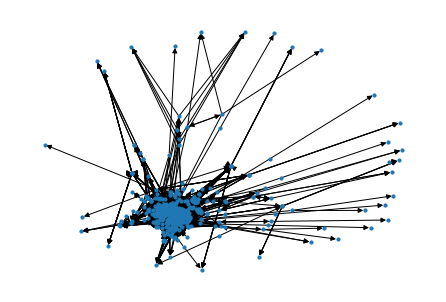

In [8]:
largest_c_nodes = max(nx.weakly_connected_components(DG), key=len)
# GCC
D_LCG = DG.subgraph(largest_c_nodes)

UND_LCG=D_LCG.to_undirected()
nx.draw(D_LCG,node_size=10)

In [4]:
D_LCG.degree()

DiDegreeView({'Baddek': 4, 'Bamboo': 1, 'Banji': 1, 'Baumar': 5, 'Bayge': 6, 'Beedle': 9, 'Bolson': 6, 'Brigo': 3, 'Cambo': 1, 'Chabi': 4, 'Chork': 3, 'Chumin': 1, 'Dabi': 5, 'Daruk': 16, 'Dauntless': 1, 'Dinraal': 1, 'Ena': 4, 'Endai': 2, 'Epona': 9, 'Farosh': 1, 'Fyson': 4, 'Goflam': 1, 'Greyson': 6, 'Heehl': 7, 'Hestu': 4, 'Hudson': 10, 'Hylia': 71, 'Kabetta': 2, 'Kanny': 6, 'Kapson': 6, 'Karson': 6, 'Kass': 14, 'Kenyo': 6, 'Kilton': 14, 'Link': 383, 'Meeshy': 2, 'Mei': 4, 'Mils': 3, 'Mina': 4, 'Mipha': 20, 'Misko': 5, 'Naydra': 7, 'Nazbi': 15, 'Pelison': 7, 'Pikango': 3, 'Revali': 13, 'Rhondson': 7, 'Rik': 2, 'Savelle': 3, 'Sho': 5, 'Sorelia': 11, 'Spoone': 2, 'Toren': 4, 'Totsuna': 1, 'Tye': 6, 'Urbosa': 19, 'Yammo': 11, 'Princess Zelda': 23, 'Zyle': 1, 'Naddon': 7, 'Pitar': 1, 'Dah Hesho': 3, 'Dmitri': 8, 'Gleema': 11, 'Jana': 9, 'Kah Mael': 3, 'Kaifa': 7, "Ke'nai Shakah": 3, 'Lonni': 1, 'Nell': 2, 'Tenne': 6, 'Tutsuwa Nima': 3, 'Ze Kasho': 3, 'Moggs': 2, 'Monari': 1, 'Ritaag Zum

In [5]:
D_LCG.edges

OutEdgeView([('Baddek', 'Link'), ('Baddek', 'Nazbi'), ('Baddek', 'Savelle'), ('Baddek', 'Yammo'), ('Bamboo', 'Stone Talus'), ('Banji', 'Stone Talus'), ('Baumar', 'Stone Talus'), ('Baumar', 'Kilton'), ('Baumar', 'Calamity Ganon'), ('Baumar', 'Stone Talus (Rare)'), ('Bayge', 'Stone Talus'), ('Bayge', 'Calamity Ganon'), ('Bayge', 'Link'), ('Bayge', 'Kilton'), ('Beedle', 'Lizalfos'), ('Beedle', 'Black Lizalfos'), ('Beedle', 'Golden Lizalfos'), ('Beedle', 'Silver Lizalfos'), ('Beedle', 'Electric Lizalfos'), ('Beedle', 'Fire-Breath Lizalfos'), ('Beedle', 'Ice-Breath Lizalfos'), ('Beedle', 'Cursed Lizalfos'), ('Beedle', 'Stalizalfos'), ('Bolson', 'Lynel'), ('Brigo', 'Link'), ('Brigo', 'Decayed Guardian'), ('Brigo', 'Guardian Stalker'), ('Cambo', 'Link'), ('Chabi', 'Link'), ('Chabi', 'Kilton'), ('Chabi', 'Blue Bokoblin'), ('Chabi', 'Black Bokoblin'), ('Chork', 'Link'), ('Chork', 'Geggle'), ('Chumin', 'Link'), ('Dabi', 'Bokoblin'), ('Dabi', 'Link'), ('Dabi', 'Stalkoblin'), ('Dabi', 'Cursed Mobl

In [9]:
UND_LCG.degree()

DegreeView({'Baddek': 4, 'Bamboo': 1, 'Banji': 1, 'Baumar': 5, 'Bayge': 6, 'Beedle': 9, 'Bolson': 6, 'Brigo': 3, 'Cambo': 1, 'Chabi': 4, 'Chork': 2, 'Chumin': 1, 'Dabi': 5, 'Daruk': 12, 'Dauntless': 1, 'Dinraal': 1, 'Ena': 4, 'Endai': 2, 'Epona': 9, 'Farosh': 1, 'Fyson': 4, 'Goflam': 1, 'Greyson': 6, 'Heehl': 7, 'Hestu': 4, 'Hudson': 9, 'Hylia': 71, 'Kabetta': 2, 'Kanny': 6, 'Kapson': 6, 'Karson': 6, 'Kass': 14, 'Kenyo': 6, 'Kilton': 14, 'Link': 383, 'Meeshy': 2, 'Mei': 4, 'Mils': 2, 'Mina': 3, 'Mipha': 20, 'Misko': 3, 'Naydra': 7, 'Nazbi': 15, 'Pelison': 6, 'Pikango': 3, 'Revali': 12, 'Rhondson': 6, 'Rik': 2, 'Savelle': 3, 'Sho': 5, 'Sorelia': 11, 'Spoone': 2, 'Toren': 4, 'Totsuna': 1, 'Tye': 6, 'Urbosa': 18, 'Yammo': 10, 'Princess Zelda': 20, 'Zyle': 1, 'Naddon': 7, 'Pitar': 1, 'Dah Hesho': 3, 'Dmitri': 6, 'Gleema': 11, 'Jana': 7, 'Kah Mael': 3, 'Kaifa': 5, "Ke'nai Shakah": 3, 'Lonni': 1, 'Nell': 2, 'Tenne': 6, 'Tutsuwa Nima': 3, 'Ze Kasho': 3, 'Moggs': 2, 'Monari': 1, 'Ritaag Zumo':

In [14]:
UND_LCG.degree('Baddek')

4

In [6]:
from infomap import Infomap

# Command line flags can be added as a string to Infomap
im = Infomap("--two-level --directed")
im.add_links(D_LCG.edges)
    
# Run the Infomap search algorithm to find optimal modules
im.run()

print(f"Found {im.num_top_modules} modules with codelength: {im.codelength}")

print("Result")
print("\n#node module")
for node in im.tree:
    if node.is_leaf:
        print(node.node_id, node.module_id)

ModuleNotFoundError: No module named 'infomap'

In [36]:
# Use the Python Louvain-algorithm implementation to find communities in the BotW network.
import community
import json

from fa2 import ForceAtlas2

#compute the best partition
partition = community.best_partition(UND_LCG)


btow_community={}
for num in set(partition.values()) :
    
    com = [node for node in partition.keys() if partition[node] == num]
    
    # find 3 most connected nodes in each com
    nodes_degree=[(node,UND_LCG.degree(node)) for node in com]
    threehighdegreenode=[node for (node, val) in sorted(nodes_degree, key=lambda pair: pair[1])][:3]
    
    c_name='_'.join(threehighdegreenode)
#     print(c_name,com)
    btow_community[c_name]=com
print(btow_community)
    
with open('./btow_community.json','w') as f:
    f.write(json.dumps(btow_community))

{'Bamboo_Banji_Hoz': ['Baddek', 'Bamboo', 'Banji', 'Baumar', 'Chabi', 'Dabi', 'Karson', 'Kilton', 'Savelle', 'Sho', 'Toren', 'Yammo', 'Hoz', 'Tera', 'Falmark', 'Kaysa', 'Cotera', 'Black Bokoblin', 'Blizzrobe', 'Blue Bokoblin', 'Bokoblin', 'Chuchu', 'Cursed Bokoblin', 'Cursed Moblin', 'Golden Bokoblin', 'Golden Moblin', 'Moblin', 'Silver Bokoblin', 'Silver Moblin', 'Stalkoblin', 'Stone Talus', 'Stone Talus (Junior)', 'Stone Talus (Senior)', 'Stone Talus (Luminous)', 'Stone Talus (Rare)', 'Black Hinox'], 'Molli_Verla_Kabetta': ['Bayge', 'Heehl', 'Kabetta', 'Revali', 'Teba', 'Tulin', 'Cree', 'Genli', 'Kheel', 'Kotts', 'Molli', 'Notts', 'Amali', 'Harth', 'Huck', 'Kaneli', 'Saki', 'Verla', 'Fire Chuchu', 'Fire Wizzrobe', 'Ice Chuchu', 'Windblight Ganon', 'Thunderblight Ganon', 'Waterblight Ganon'], 'Dauntless_Lonni_Kairo': ['Beedle', 'Daruk', 'Dauntless', 'Kass', 'Nazbi', 'Sorelia', 'Urbosa', 'Princess Zelda', 'Lonni', 'King Rhoam', 'Toffa', 'Yunobo', 'Drak', 'Dugby', 'Grapp', 'Kairo', 'Bar

In [12]:
partition 

{'Baddek': 0,
 'Bamboo': 0,
 'Banji': 0,
 'Baumar': 0,
 'Bayge': 14,
 'Beedle': 2,
 'Bolson': 8,
 'Brigo': 4,
 'Cambo': 5,
 'Chabi': 0,
 'Chork': 5,
 'Chumin': 5,
 'Dabi': 0,
 'Daruk': 2,
 'Dauntless': 2,
 'Dinraal': 16,
 'Ena': 16,
 'Endai': 7,
 'Epona': 7,
 'Farosh': 16,
 'Fyson': 8,
 'Goflam': 5,
 'Greyson': 8,
 'Heehl': 14,
 'Hestu': 5,
 'Hudson': 8,
 'Hylia': 9,
 'Kabetta': 14,
 'Kanny': 10,
 'Kapson': 8,
 'Karson': 0,
 'Kass': 2,
 'Kenyo': 3,
 'Kilton': 0,
 'Link': 5,
 'Meeshy': 5,
 'Mei': 12,
 'Mils': 5,
 'Mina': 5,
 'Mipha': 12,
 'Misko': 5,
 'Naydra': 3,
 'Nazbi': 2,
 'Pelison': 8,
 'Pikango': 7,
 'Revali': 14,
 'Rhondson': 8,
 'Rik': 7,
 'Savelle': 0,
 'Sho': 0,
 'Sorelia': 2,
 'Spoone': 3,
 'Toren': 0,
 'Totsuna': 5,
 'Tye': 10,
 'Urbosa': 2,
 'Yammo': 0,
 'Princess Zelda': 2,
 'Zyle': 5,
 'Naddon': 10,
 'Pitar': 5,
 'Dah Hesho': 3,
 'Dmitri': 7,
 'Gleema': 7,
 'Jana': 7,
 'Kah Mael': 9,
 'Kaifa': 7,
 "Ke'nai Shakah": 9,
 'Lonni': 2,
 'Nell': 4,
 'Tenne': 7,
 'Tutsuwa Nima':

Calculate the modularity of this partition. Modularity is described in the Network Science book, section 9.4. Use equation 9.12 in the book to calculate the modularity M of the partitions described above. 

100%|██████████| 2000/2000 [00:05<00:00, 389.41it/s]


BarnesHut Approximation  took  1.16  seconds
Repulsion forces  took  3.46  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.24  seconds


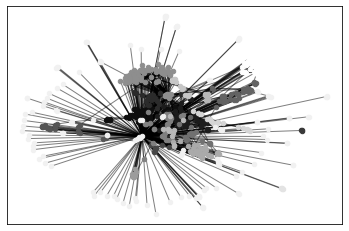

In [51]:
size = float(len(set(partition.values())))

# fa2 help to determine the positions of the nodes 
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

pos = forceatlas2.forceatlas2_networkx_layout(UND_LCG, pos=None, iterations=2000)

count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(UND_LCG, pos, list_nodes, node_size = 20,
                                node_color = str(count/ size))


nx.draw_networkx_edges(UND_LCG,pos, alpha=0.5)
plt.show()